# 1. PERKENALAN

* Nama : Ahmad Junjung Sudrajad
* Batch : RMT - 033
* Objectives : Dalam project ini akan membuat suatu model machine learning yang dimana bisa memprediksi orang orang atau konsumen terhadap subscibe deposit di suatu bank. Sehingga dalam pengembangan project ini maka diperlukan beberapa tahapan yang bisa menunjang untuk keberhasilan seperti EDA, Preprocessing, Modeling dan Evaluasi terhadap model. Dengan adanya project ini diharapkan dapat mempermudah suatu bank untuk memprediksi orang orang yang akan berkecenderungan memilih untuk subcrobe berdasarkan model yang dibuat
* Deployment : [klik disini](https://huggingface.co/spaces/junjung214/Milestone2)

# 2. IMPORT LIBRARY

In [13]:
# untuk pengolahan data
import pandas as pd
import numpy as np

#untuk statistik
import scipy.stats as stats
from scipy.stats import chi2_contingency, pointbiserialr

#untuk vissualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#untuk feature engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
#untuk model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
#untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

#untuk save model
import pickle
import json

In [14]:
import sklearn

In [15]:

np.__version__

'1.23.5'

# 3. LOAD DATA

Dataset yang digunakan adalah : 
* **BANK MARKETING**
* Deskripsi dataset : The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
* Link : **`https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing`**

In [16]:
df_ori = pd.read_csv('bank-additional-full.csv',sep=';')
df_ori

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari hasil diatas dapat dilihat bahwasnya data terdiri dari 41188 entitas dan 21 kolom yang termasuk data sudah tergolong besar. dan juga ada yang tergolong kategorikal dan numeric

In [18]:
df_ori.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
df_ori.duplicated().sum()

12

In [20]:
duplicated = df_ori.duplicated().sum()
percentage = duplicated/41188*100
print(f"Persentasi duplicate = {percentage} %")

Persentasi duplicate = 0.02913469942701758 %


Didalam data diatas tidak terdapat nilai null values tetapi ada 12 data yang duplikat sehingga perlu di handle kedepannya

In [21]:
df_ori['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [22]:
no = 36548
yes = 4640
percet_no = (no/(no+yes))*100
percet_yes = (yes/(no+yes))*100
print(f'Percentage of Yes Class : {percet_yes} %')
print(f'Percentage of No Class : {percet_no} %')


Percentage of Yes Class : 11.265417111780131 %
Percentage of No Class : 88.73458288821988 %


Data target bisa dikatakan sangat imbalanced dimana hal ini dapat mempengaruhi pemodelan yang akan dibuat sehingga perlu diberikan pendekatan untuk hanlde kasus imbalanced dataset dengan perbandingan 89:11

## 3.1 Conlusion Data 

Dari dataset diatas dapat disimpulkan sebegai berikut : 
1. Dataset ini memiliki target berupa kolom 'y' dimana untuk kasus prediksi subscribe ke deposit bank 
2. Dataset ini memiliki duplikat data yang cenderung sangat kecil yakni 0,00002
3. Dataset ini memiliki beberapa tipe data yang nantinya harus bisa dikelompokkan sesuai dengan type nya sehingga bisa di analisa lebih objective
4. Data target 'y' memiliki imbalanced dengan rasio 88:12 sehingga perlu diberikan handling sebelum membuat model terhadap dataset ini

## 3.2 MetaData



| **No** | **Nama Variabel**      | **Tipe Data**       | **Kategori** | **Deskripsi**                                                                                                   |
|--------|------------------------|---------------------|--------------|---------------------------------------------------------------------------------------------------------------|
| 1      | age                    | Numerik             |              | Umur klien bank                                                                                               |
| 2      | job                    | Kategorikal         | 12           | Jenis pekerjaan klien (admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown) |
| 3      | marital                | Kategorikal         | 4            | Status perkawinan klien (divorced, married, single, unknown)                                                   |
| 4      | education              | Kategorikal         | 8            | Tingkat pendidikan klien (basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown) |
| 5      | default                | Kategorikal         | 3            | Apakah klien memiliki kredit yang bermasalah? (no, yes, unknown)                                               |
| 6      | housing                | Kategorikal         | 3            | Apakah klien memiliki pinjaman perumahan? (no, yes, unknown)                                                   |
| 7      | loan                   | Kategorikal         | 3            | Apakah klien memiliki pinjaman pribadi? (no, yes, unknown)                                                     |
| 8      | contact                | Kategorikal         | 2            | Jenis komunikasi kontak (cellular, telephone)                                                                 |
| 9      | month                  | Kategorikal         | 12           | Bulan kontak terakhir dalam setahun (jan, feb, mar, ..., nov, dec)                                             |
| 10     | day_of_week            | Kategorikal         | 5            | Hari kontak terakhir dalam seminggu (mon, tue, wed, thu, fri)                                                  |
| 11     | duration               | Numerik             |              | Durasi kontak terakhir, dalam detik (Durasi ini sangat mempengaruhi target output, sehingga hanya digunakan untuk tujuan benchmark) |
| 12     | campaign               | Numerik             |              | Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini                                           |
| 13     | pdays                  | Numerik             |              | Jumlah hari yang berlalu sejak klien terakhir kali dihubungi dari kampanye sebelumnya (999 berarti klien belum pernah dihubungi sebelumnya) |
| 14     | previous               | Numerik             |              | Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini                                          |
| 15     | poutcome               | Kategorikal         | 3            | Hasil kampanye pemasaran sebelumnya (failure, nonexistent, success)                                            |
| 16     | emp.var.rate           | Numerik             |              | Tingkat variasi ketenagakerjaan - indikator kuartalan                                                         |
| 17     | cons.price.idx         | Numerik             |              | Indeks harga konsumen - indikator bulanan                                                                      |
| 18     | cons.conf.idx          | Numerik             |              | Indeks kepercayaan konsumen - indikator bulanan                                                                |
| 19     | euribor3m              | Numerik             |              | Tingkat euribor 3 bulan - indikator harian                                                                     |
| 20     | nr.employed            | Numerik             |              | Jumlah karyawan - indikator kuartalan                                                                          |
| 21     | y                      | Biner               | 2            | Apakah klien berlangganan deposito berjangka? (yes, no)                                                        |



# 4. EDA 

Dalam bagian EDA ini akan mengeksplore terhadap dataset dengan analisa deskriptif ataupun inferencial sehingga bisa mendapati insight terhadap kondisi dataset yang ada

In [23]:
df_eda = df_ori.copy()

## 4.1 Duplicate Data

In [24]:
#pengecekkan duplikasi data
duplicated = df_eda.duplicated().sum()
#untuk menghitung persentase 
total_records = len(df_eda)
percentage = duplicated/total_records*100
#menampilkan
print(f"Persentasi duplicate = {percentage} %")

Persentasi duplicate = 0.02913469942701758 %


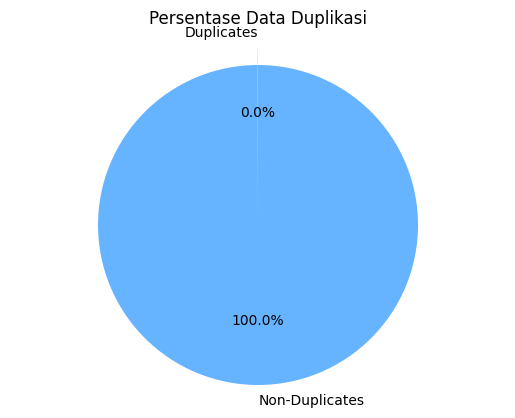

In [25]:
# Membuat plot
labels = ['Duplicates', 'Non-Duplicates']
sizes = [duplicated, total_records - duplicated]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Meledakkan bagian duplikat

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Persentase Data Duplikasi')
plt.show()

Dapat dilihar dari chart diatas bahkan duplikasi tergolong sangat kecil sehingga apabila diberikan pendekatan drop juga tidak memiliki pengaruh yang besar terhadap dataset

## 4.2 Data Target

Pada analisa kali ini akan memiliki objective yakni Prediksi Subcribe terhadap deposit suatu bank sehingga diperlukan explorasi data target terlebih dahulu 

In [26]:
df_eda['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [27]:
no = 36548
yes = 4640
#menghitung persentase
percet_no = (no/(no+yes))*100
percet_yes = (yes/(no+yes))*100
print(f'Percentage of Yes Class : {percet_yes} %')
print(f'Percentage of No Class : {percet_no} %')


Percentage of Yes Class : 11.265417111780131 %
Percentage of No Class : 88.73458288821988 %


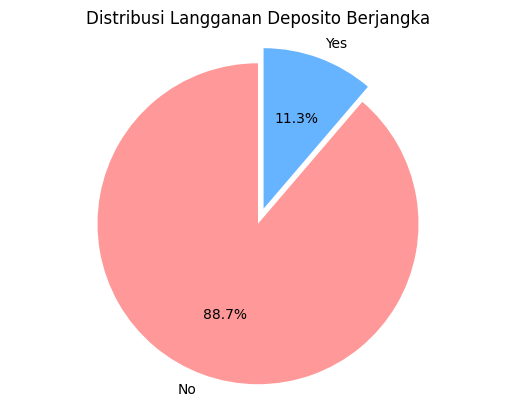

In [28]:
# Menghitung jumlah dan persentase
counts = df_eda['y'].value_counts()
percentages = counts / len(df_eda) * 100


# Membuat plot
labels = ['No', 'Yes']
sizes = [counts['no'], counts['yes']]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Meledakkan bagian 'No'

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribusi Langganan Deposito Berjangka')
plt.show()

Dalam dataset ini dapat dilihat mayoritas data memiliki target no atau tidak berlangganan dengan persentase 88.7% sedangkan yang berlangganan hanya 11.3% sehingga dalam kasus objectives project ini diperlukan handling yang bisa mengatasi kasus imblanced data target

## 4.3 Pengelompokkan Tipe Data

Dalam dataset ini sudah ada deklarasi dari awal terhadap tipe dataset yang ada seperti di meta data sehingga dalam pengelompokkannya akan memiliki patokan seperti di meta data

1. Data Kategorikal : 
    * job
    * martial
    * eductaion
    * loan
    * contact
    * 'month',
    * 'day_of_week',
    * 'poutcome',
    * 'y'

2. Data Numerik :
    * 'age',
    * 'duration',
    * 'campaign',
    * 'pdays',
    * 'previous',
    * 'emp.var.rate',
    * 'cons.price.idx',
    * 'cons.conf.idx',
    * 'euribor3m',
    * 'nr.employed'


In [29]:
#Filter untuk kategori 
cat_col = df_eda.select_dtypes(include='object').columns.to_list()
#buat dataframe baru untuk cat col
df_eda_cat = df_eda[cat_col]
df_eda_cat.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no


In [30]:
#Filter untuk numerik kontinue 
num_col = df_eda.select_dtypes(include=['int64','float64']).columns.to_list()
#buat dataframe baru untuk cat col
df_eda_num = df_eda[num_col]
df_eda_num.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0


## 4.4 Distibusi Data

Dalam hal ini akan mengecek persebaran data untuk setiap tipe data, dalam case data kategorikal hanya akan menampilkan chart setiap datanya karena bertipe kategori jadi tidak perlu pengecekkan Distribusi data

### 4.4.1 Data Kategori 

Dalam bagian ini akan menampilkan plot setiap data 

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


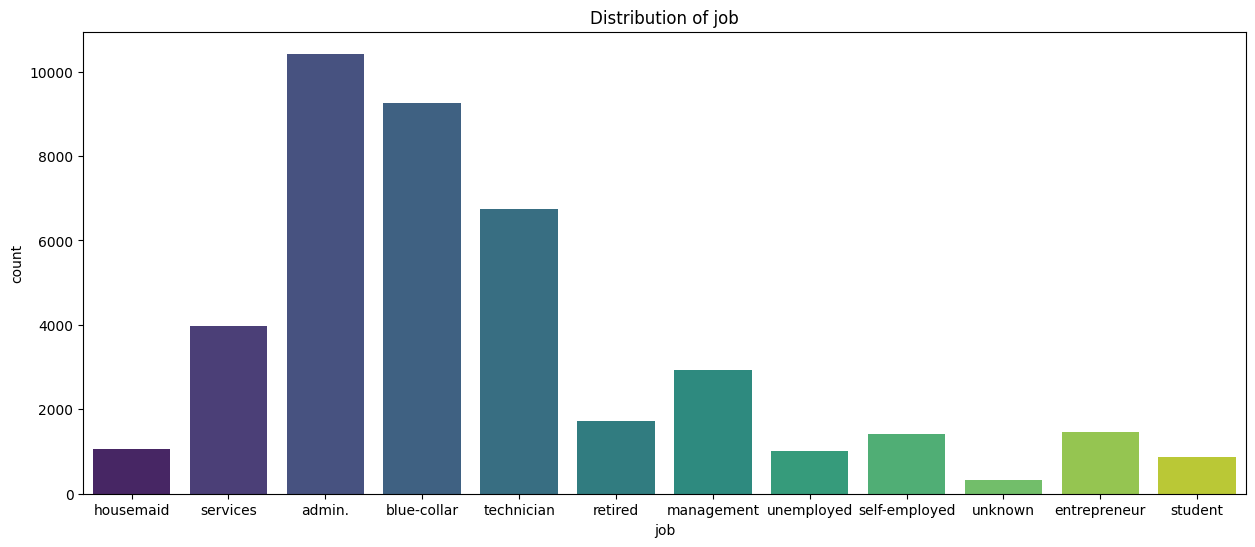

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


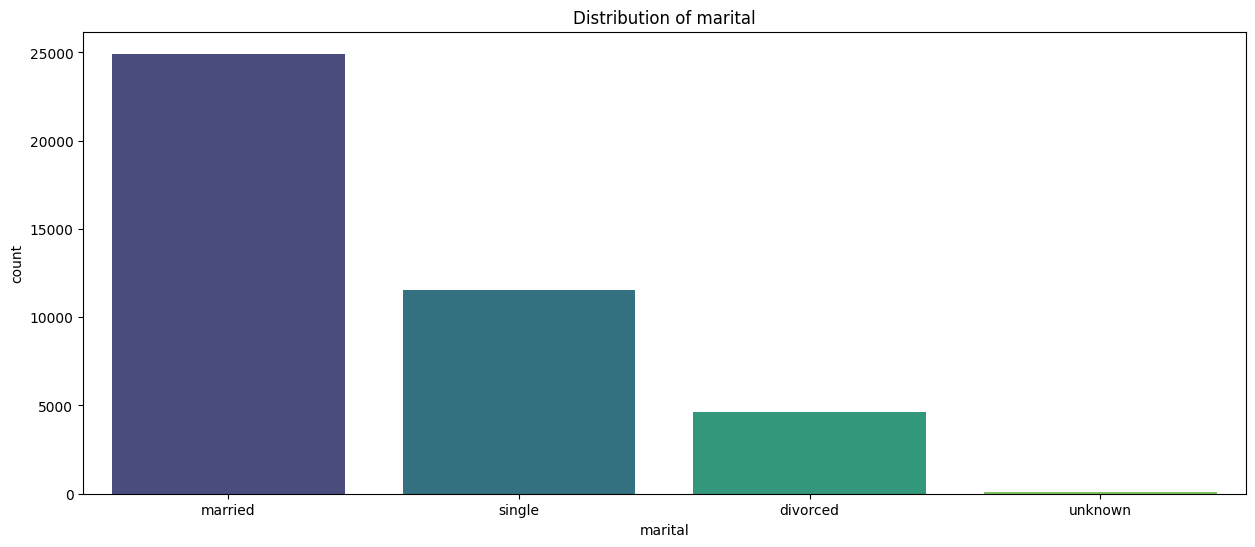

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


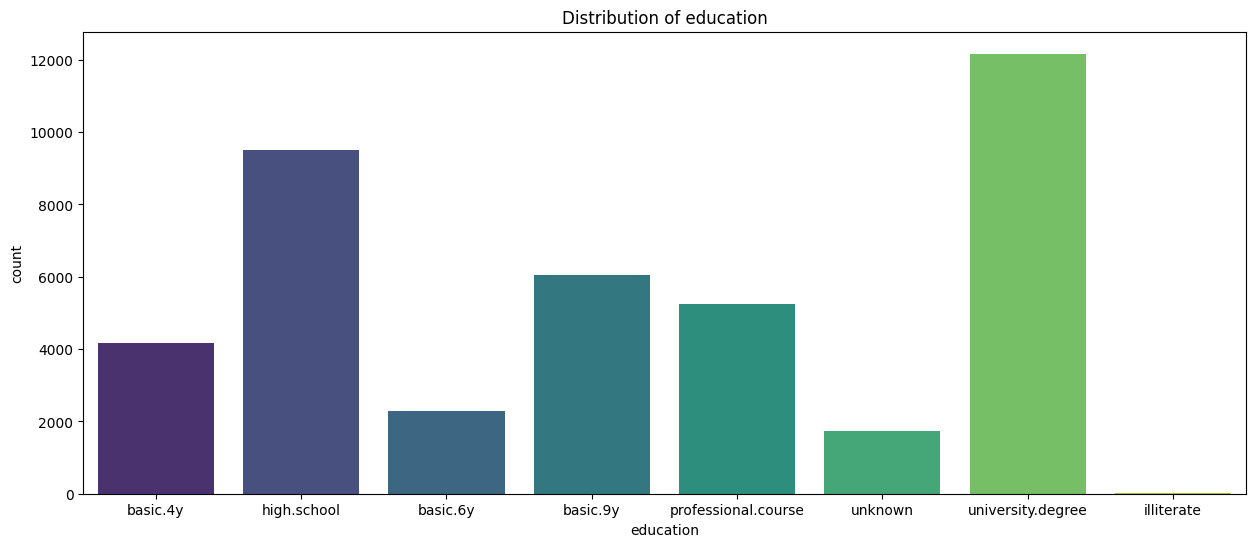

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


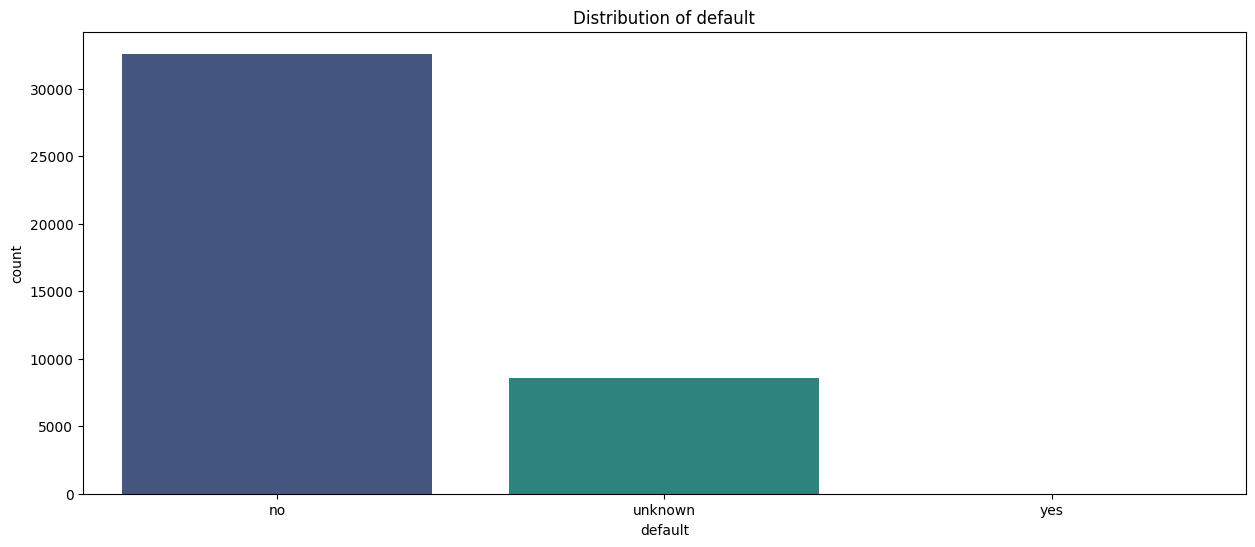

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


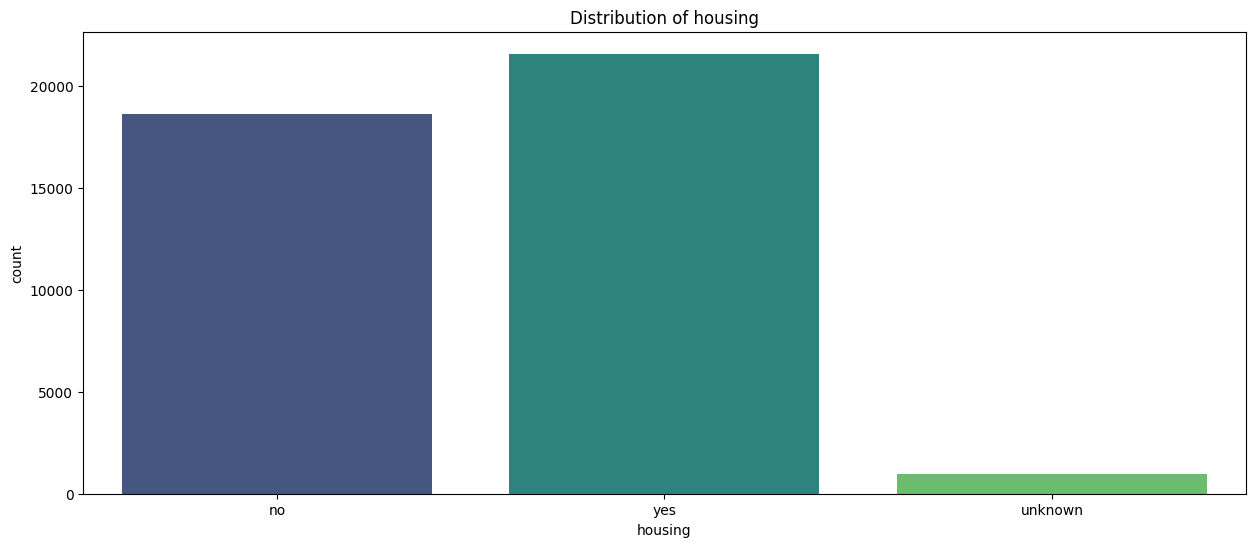

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


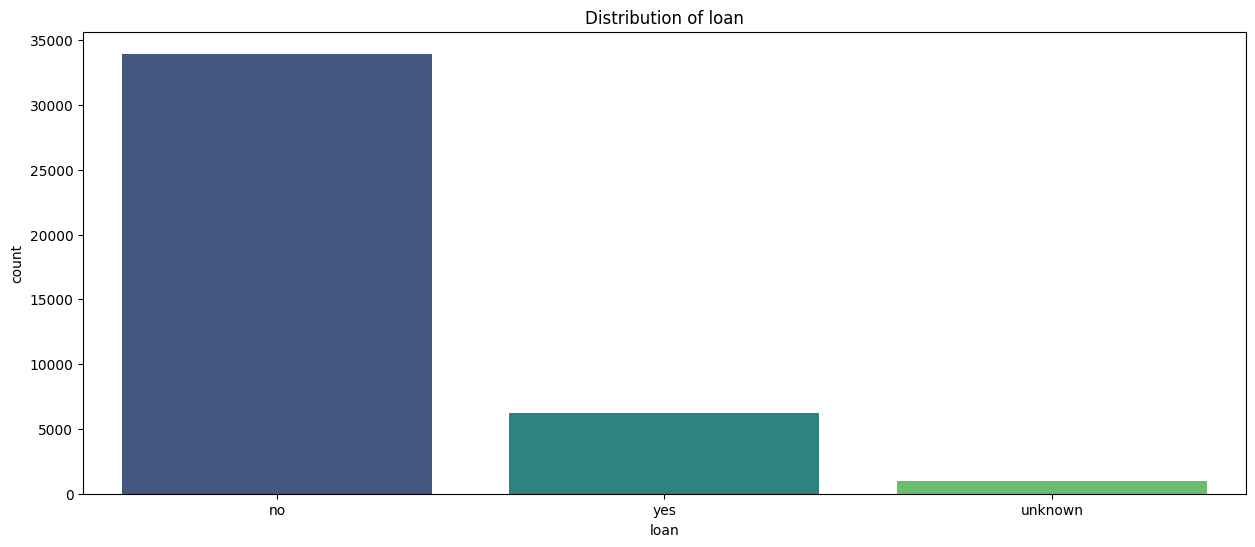

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


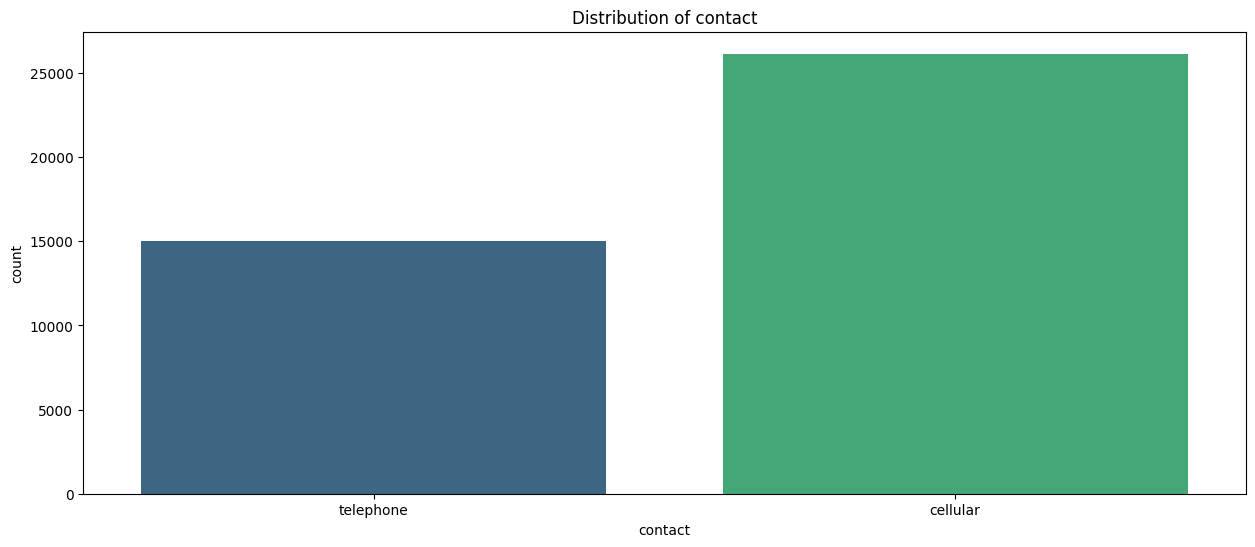

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


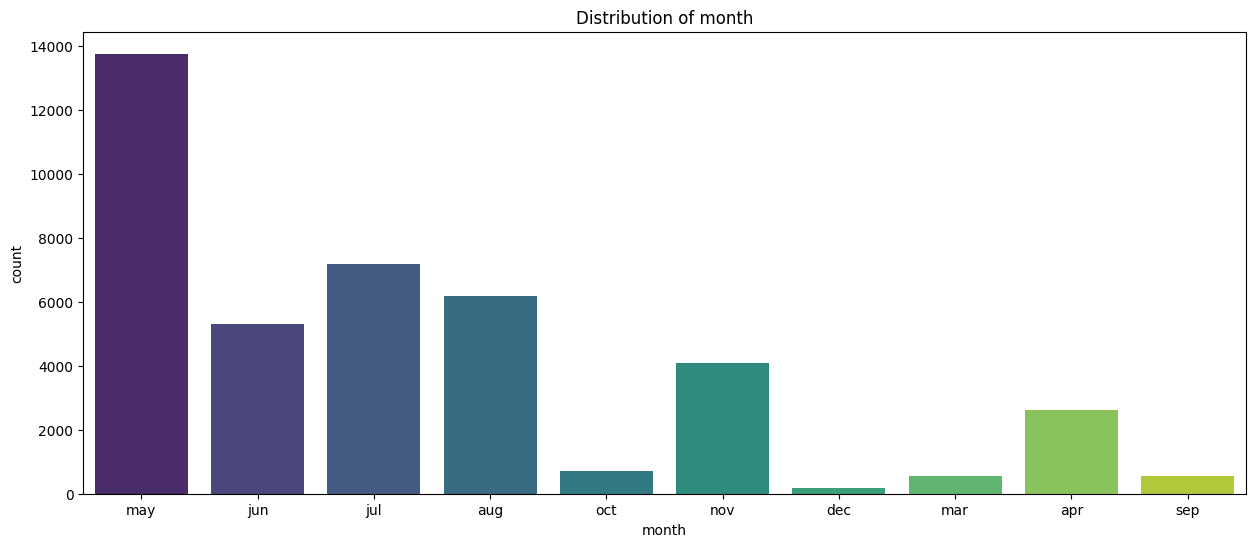

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


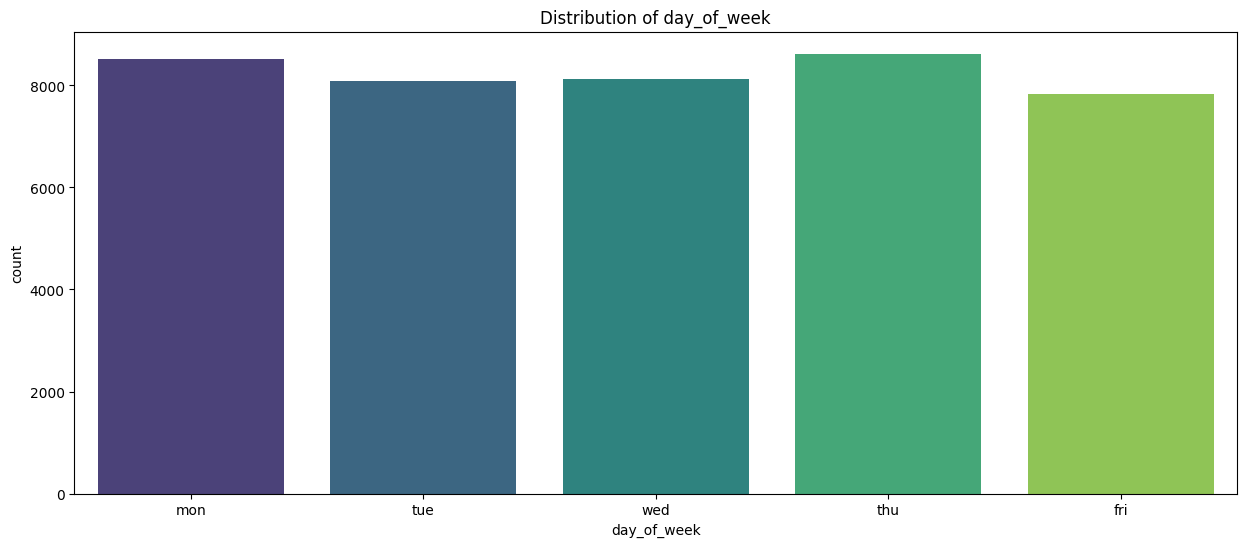

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


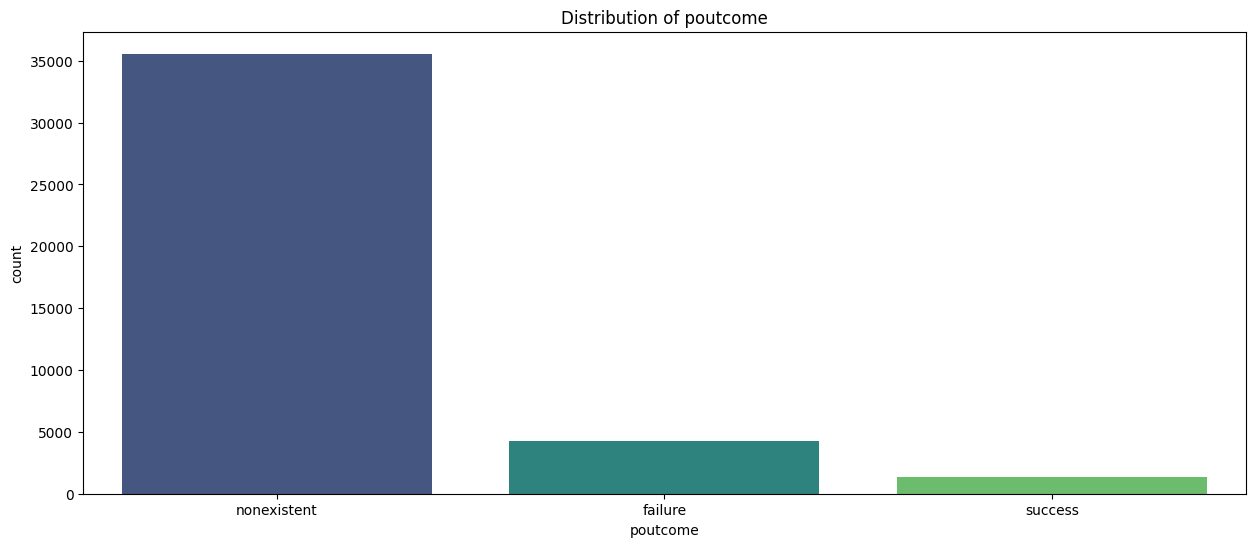

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2180607874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda_cat,palette='viridis')


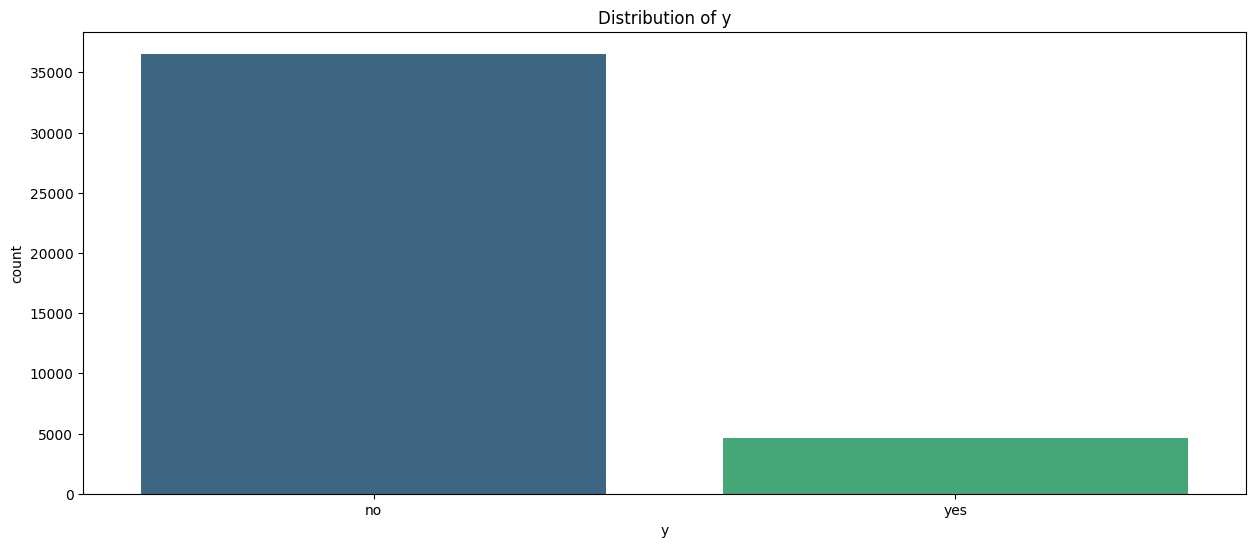

In [31]:
#looping untuk membuat visualisasi plot secara langsung terhadap seluruh fitur didalam data categori
for col in cat_col:
    #membuat besaran canva
    plt.figure(figsize=(15,6))
    #karena data kategorikal maka paling cocok digunakan dengan countplot
    sns.countplot(x=col, data=df_eda_cat,palette='viridis')
    #definisikan title untuk setiap plot
    plt.title(f'Distribution of {col}')
    #meanmpilkan plot
    plt.show()

Dalam distribusi diatas dilihat bahawasanya terdapat beberapa fitur yang memilki values `unknown` yakni : 
* job = pekerjaan
* martial = status menikah
* education = pendidikan
* default = kepemilikan credit card
* housing = pinjaman rumah
* loan = pinjaman pribadi 

Dari hasil diatas maka dapat diindakasikan beberapa bahwasanya data data diatas bisa dikategorikan menjadi suatu missing value tetapi dirubah menjadi unknown sehingga diperlukan analisa lebih lanjut untuk bisa mengkategorikan apakah data data diatas memang suatu missing value (MAR, MCAR, MNAR) atau memang data rahasia yang memang tidak bisa dipublikasikan menurut individu tersebut

### 4.4.2 Data Numerik Kontinue

Pada bagian ini akan mengecek distribusi dengan 3 cara dan akan dibandingkan dengan cara pertama yakni central tendecy, lalu cek skew, dan yang terakhir cek melalui visual plot

In [32]:
#pengecekkan central tendecy dengan menghitung mean dan median melalui descibe
df_eda_num.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Dalam hasil diatas dapat dilihat sebagai berikut : 
1. Skew Positif ( Mean Lebih besar dari pada Median ): 
    * Age
    * Duration
    * campaign
    * previous
    * cons.conf.idx
2. Skew Negatif ( Mean Lebih kecil dari pada Median ): 
    * pdays
    * emp.var.rate
    * cons.price.idx
    * euribor3m
    * employed

In [33]:
#Pengecekan melalui uji skew
#membuat var untuk list
listItem = []
#mengecek keseluruhan nilai dengan looping
for col in df_eda_num:
    #menambahkan ke var listItem untuk nilai skew
    listItem.append([col, df_eda_num[col].skew()])
#membuat dataframe untuk skew
skew_df = pd.DataFrame(columns=['Feature','Skewness'], data=listItem)
skew_df

,Feature,Skewness
0,age,0.784697
1,duration,3.263141
2,campaign,4.762507
3,pdays,-4.922190
4,previous,3.832042
5,emp.var.rate,-0.724096
6,cons.price.idx,-0.230888
7,cons.conf.idx,0.303180
8,euribor3m,-0.709188
9,nr.employed,-1.044262


Setlah dicek dengan pendekatan nilai skew maka ada beberapa yang berbeda dibandingkan dengan Central Tendency yakni pada fitur cons.conf.idx dan cons.price.idx berdistribusi normal bukan skew karena nilainya masih diantara -0,5 s.d 0.5 

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


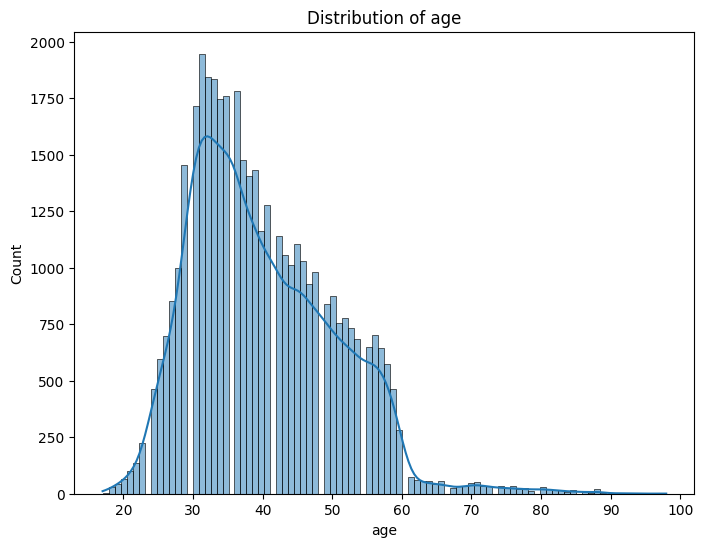

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


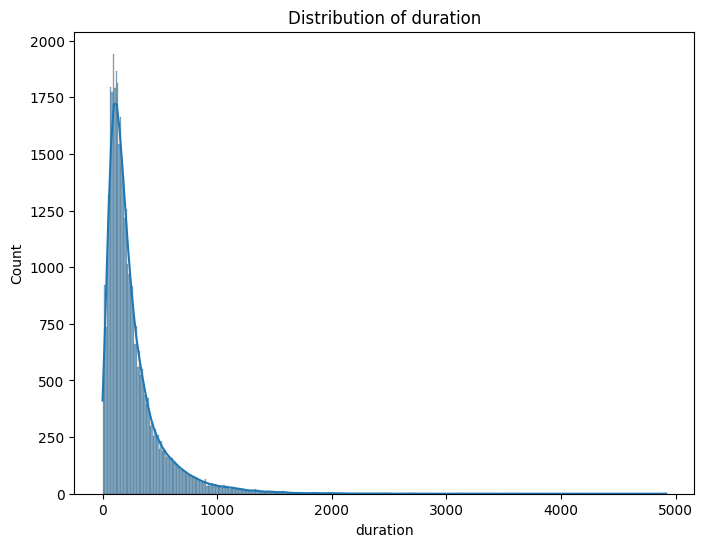

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


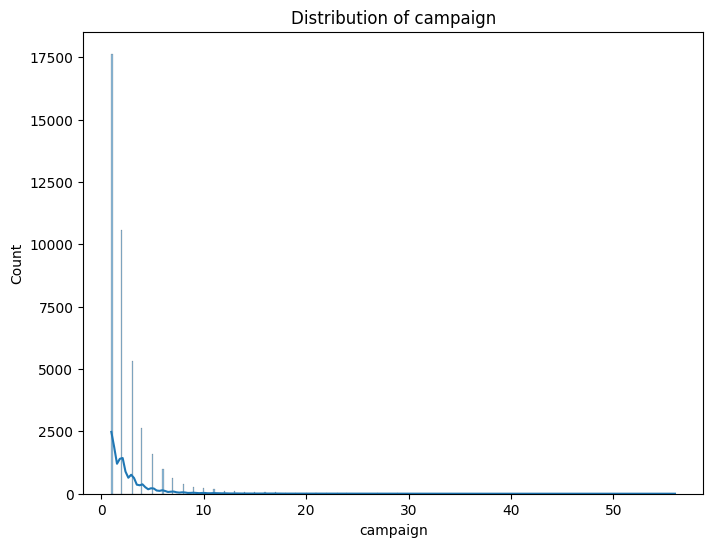

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


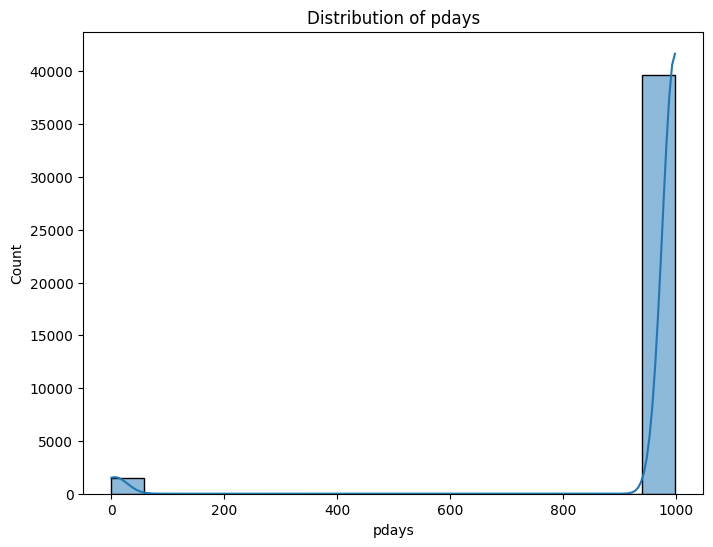

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


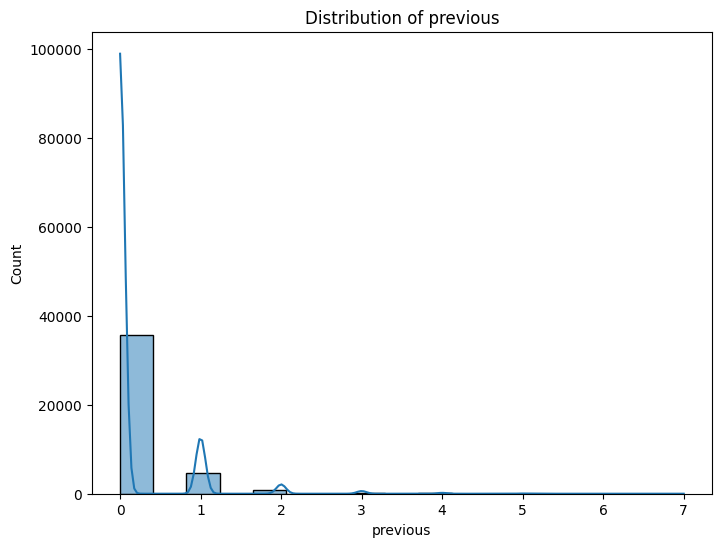

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


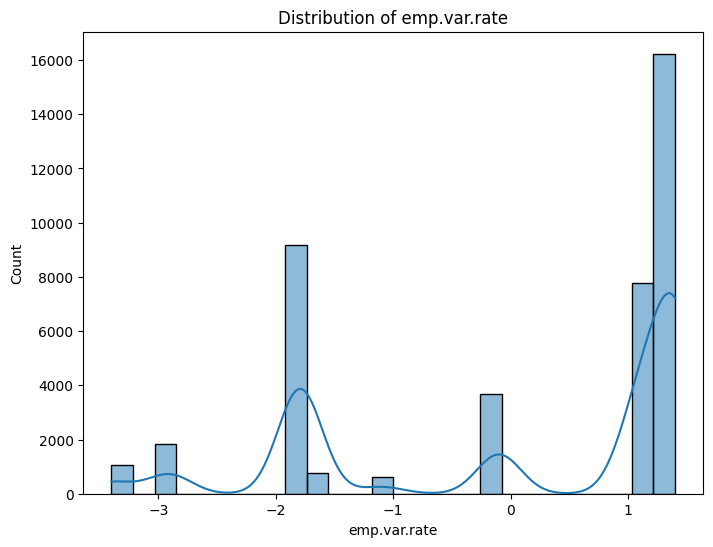

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


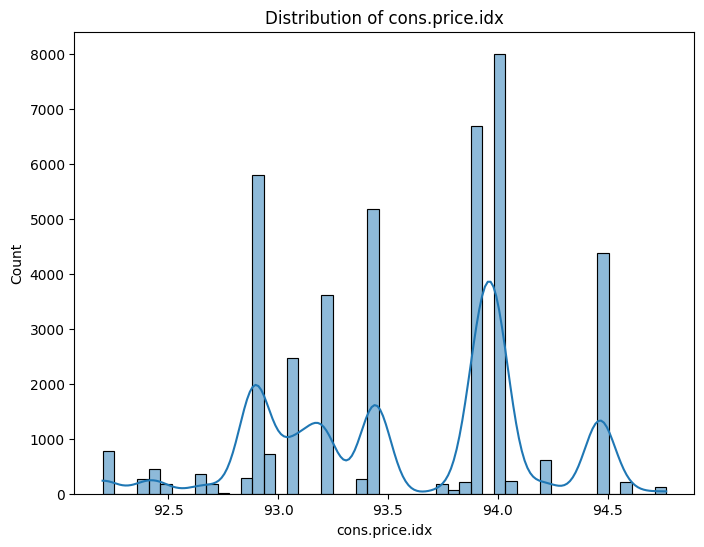

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


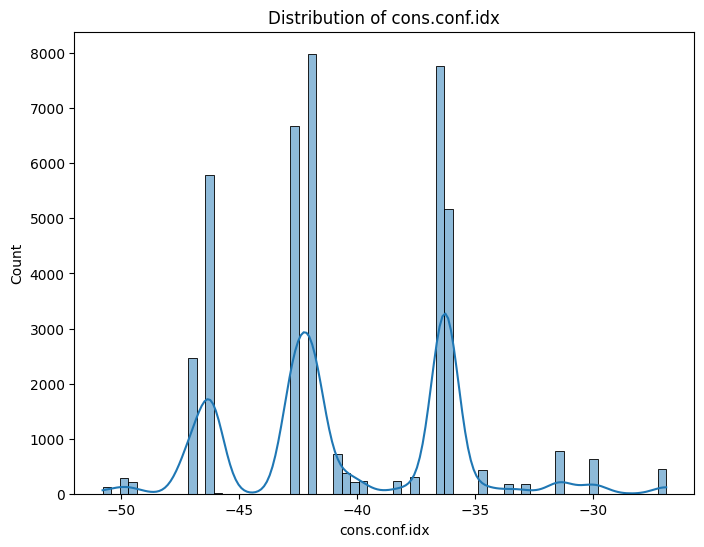

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


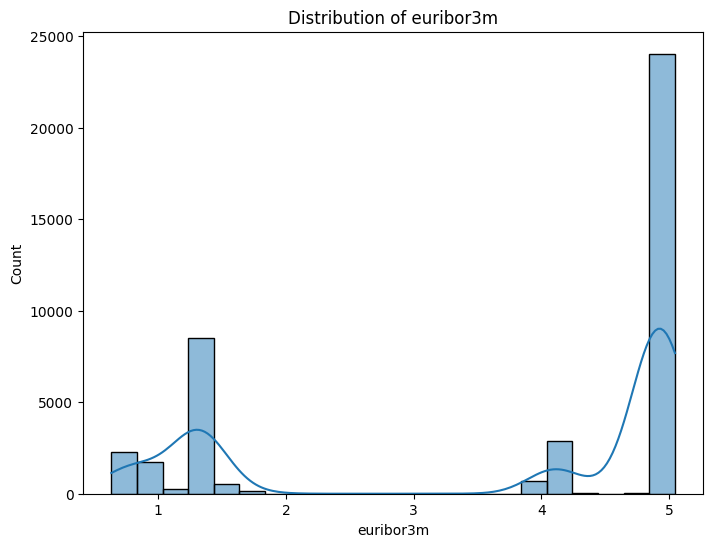

C:\Users\User\AppData\Local\Temp\ipykernel_28600\2725535240.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')


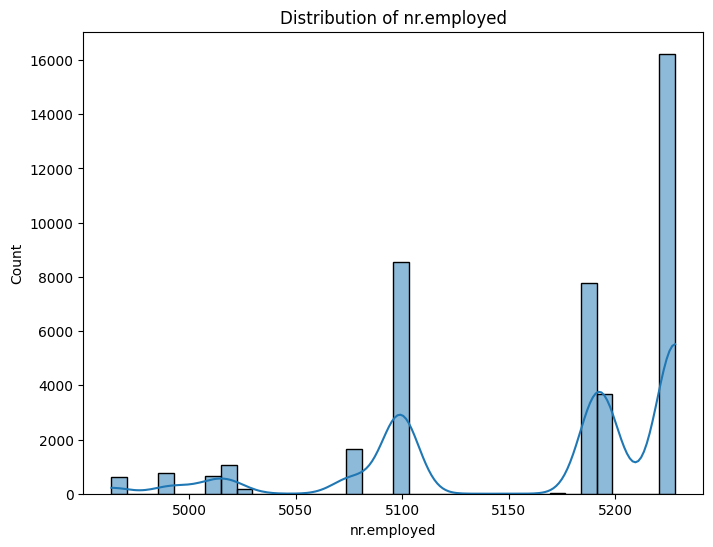

In [34]:
#Pengecekan distribusi berdasarkan visualisasi plot
#membuat loopong untuk setiap feature di dataset numerik
for col in df_eda_num.columns:
  #setting besaran canva
  plt.figure(figsize=(8, 6))
  #menggunakan histogram karena bersifat numerik sehingga cocok untuk dijadikan visualisasi
  sns.histplot(x=col, data=df_eda_num,kde = True ,palette='viridis')
  plt.title(f'Distribution of {col}')
  plt.show()

Apabila dilihat dengan menggunakan plot sangat sulit digambarkan bagaiman kondisi distrubusi terhadap dataset ini sehingga untuk penentuan distribusi data lebih baik tetap menggunakan pengecekan melalui tes skewness. 

In [35]:
#Save list hasil cek skew untuk pengecekkan outliers dan handlingnya
listSkew = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'euribor3m', 'nr.employed']
listNorm = ['cons.price.idx','cons.conf.idx']

#buat dataframe yang berdasarkan distribusinya
df_eda_num_norm = df_eda_num[listNorm]
df_eda_num_skew = df_eda_num[listSkew]

## 4.5 Pengecekkan Outliers

Pada bagian ini akan mengecek outliers terhadap data numerik saja dan juga digolongkan sesuai dengan distribusinya

### 4.5.1 Distribusi Skew

Pengecekkan menggunakan metode Tukey's Rule karena memilki persebaran skew 

In [36]:
#membuat variable untuk menampung data
listItem = []

for col in df_eda_num_skew:
    #menggunakan metode Tukey's Rule Karena Distribusi Skew
    q1 = df_eda_num_skew[col].quantile(0.25)
    q3 = df_eda_num_skew[col].quantile(0.75)
    iqr = q3-q1
    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr
    outliers = df_eda_num_skew[col][(df_eda_num_skew[col]>up_bound) | (df_eda_num_skew[col]<low_bound)]
    no_outliers = df_eda_num_skew[col][(df_eda_num_skew[col]<=up_bound) & (df_eda_num_skew[col]>=low_bound)]
    percentage = len(outliers)*100/len(df_eda_num_skew[col])
    listItem.append([col, percentage])
#convert to dataframe
outliers_df_skew = pd.DataFrame(columns=['Feature','Outliers'], data=listItem)
outliers_df_skew


,Feature,Outliers
0,age,1.138681
1,duration,7.193843
2,campaign,5.841507
3,pdays,3.678256
4,previous,13.656890
5,emp.var.rate,0.000000
6,euribor3m,0.000000
7,nr.employed,0.000000


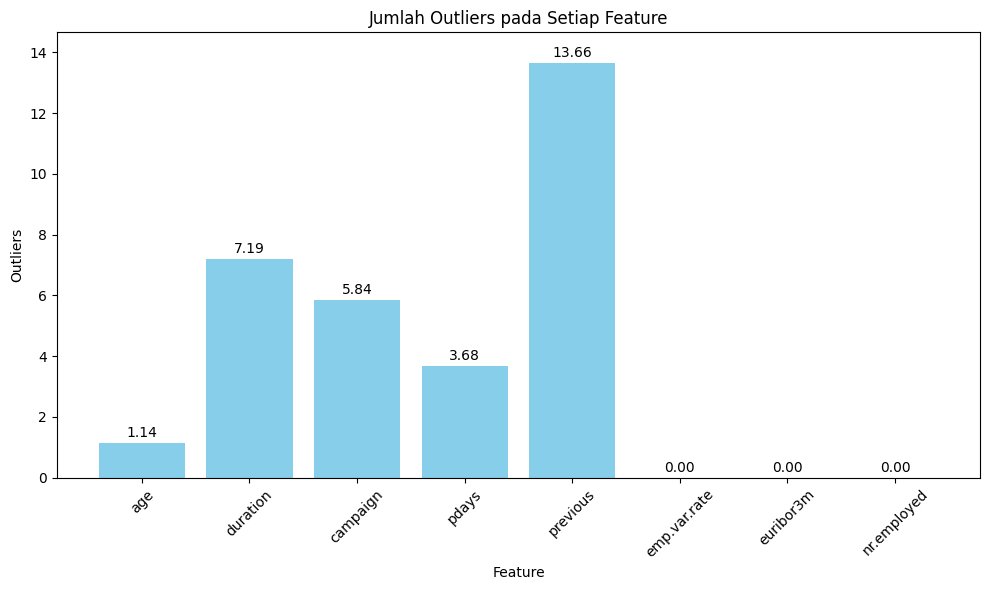

In [37]:
# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(outliers_df_skew['Feature'], outliers_df_skew['Outliers'], color='skyblue')

plt.xlabel('Feature')
plt.ylabel('Outliers')
plt.title('Jumlah Outliers pada Setiap Feature')
plt.xticks(rotation=45)
plt.ylim(0, max(outliers_df_skew['Outliers']) + 1)  # Memberi sedikit ruang di atas bar tertinggi

# Menampilkan nilai outliers di atas setiap bar
for i, v in enumerate(outliers_df_skew['Outliers']):
    plt.text(i, v + 0.2, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

Dari hasil diatas dapat dilihat bahwasanya outliers yang dimilkii tergolong besar apabila menggunakan metode Tukey's Rule

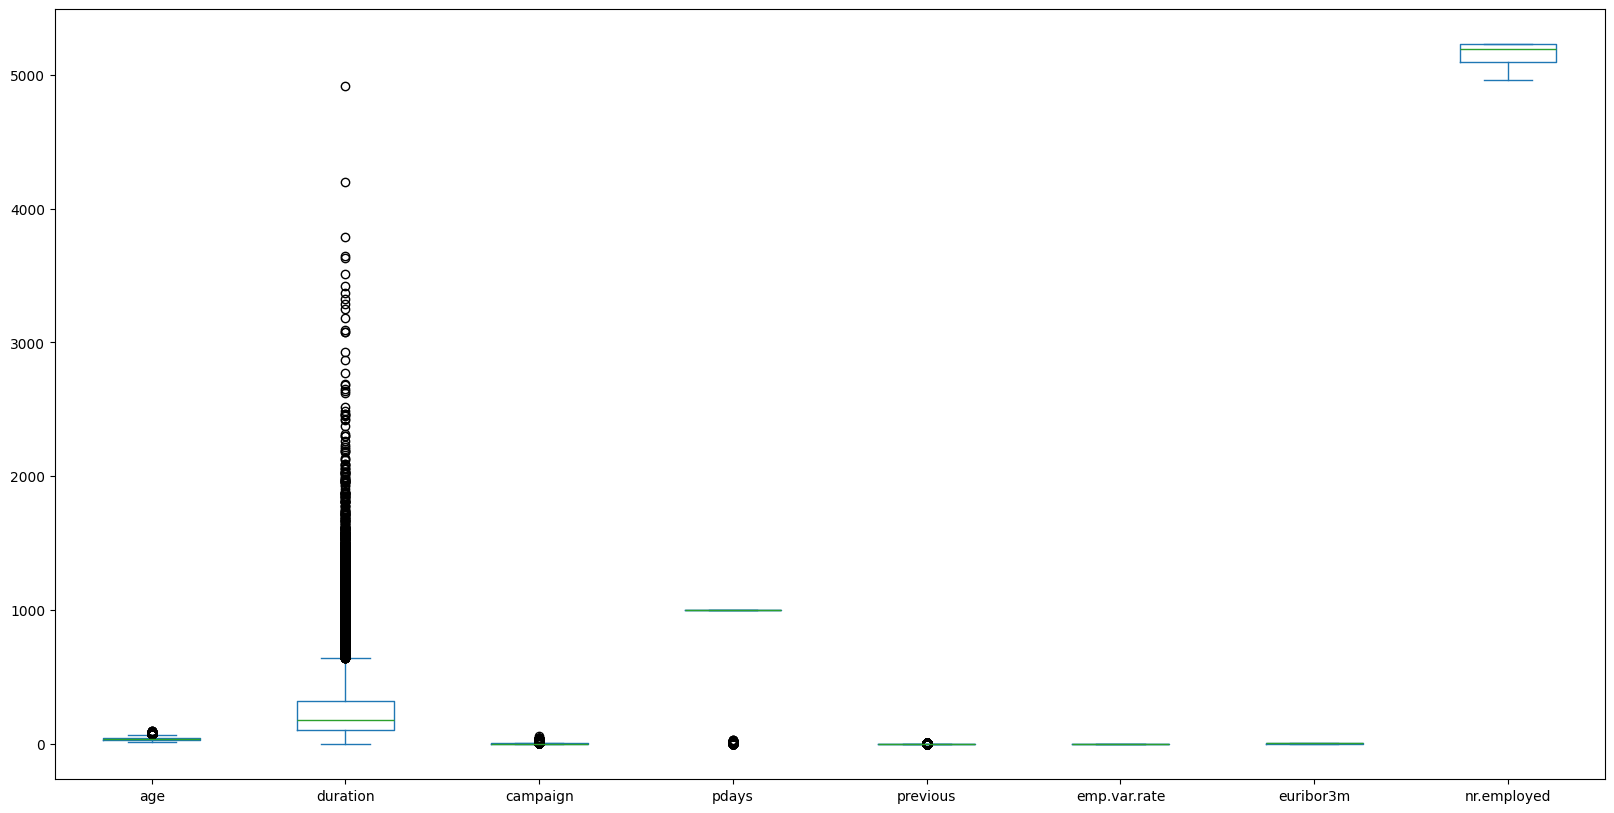

In [38]:
#membuat boxplot untuk keselurhan data skew 
df_eda_num_skew.plot(kind='box',figsize=(20,10))
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28600\1316613273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_skew[col], palette='pink')


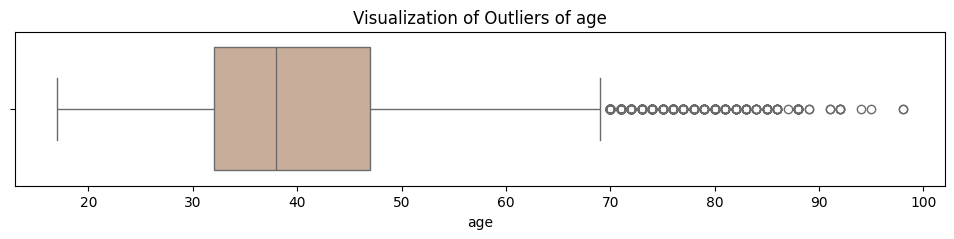

C:\Users\User\AppData\Local\Temp\ipykernel_28600\1316613273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_skew[col], palette='pink')


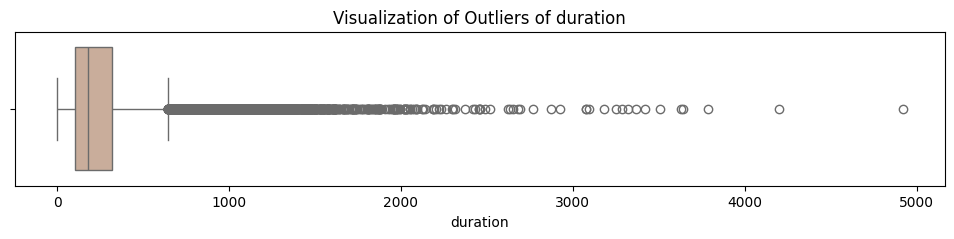

C:\Users\User\AppData\Local\Temp\ipykernel_28600\1316613273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_skew[col], palette='pink')


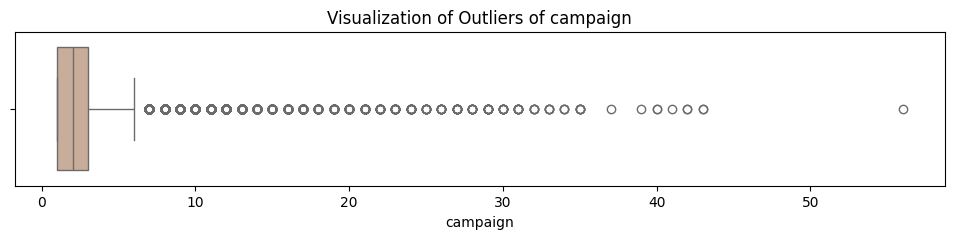

C:\Users\User\AppData\Local\Temp\ipykernel_28600\1316613273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_skew[col], palette='pink')


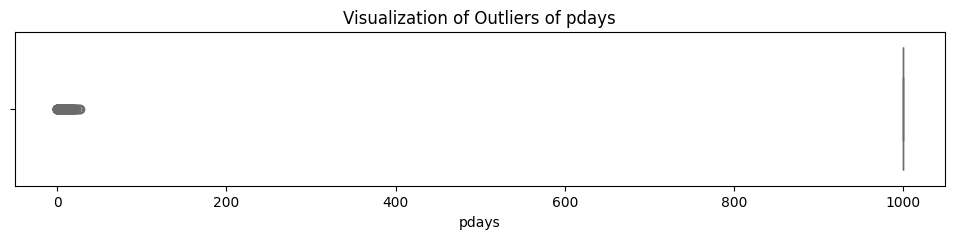

C:\Users\User\AppData\Local\Temp\ipykernel_28600\1316613273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_skew[col], palette='pink')


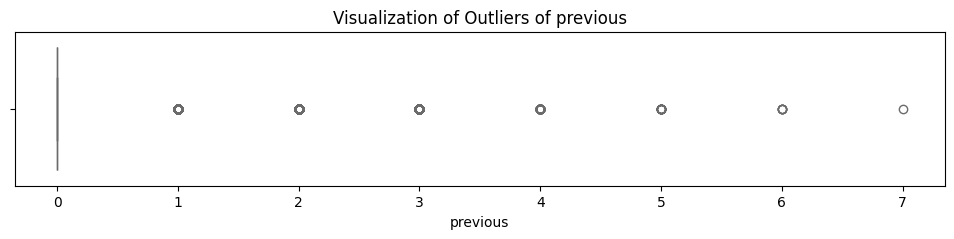

C:\Users\User\AppData\Local\Temp\ipykernel_28600\1316613273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_skew[col], palette='pink')


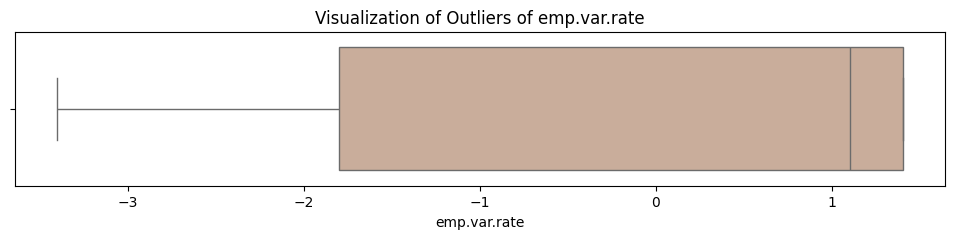

C:\Users\User\AppData\Local\Temp\ipykernel_28600\1316613273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_skew[col], palette='pink')


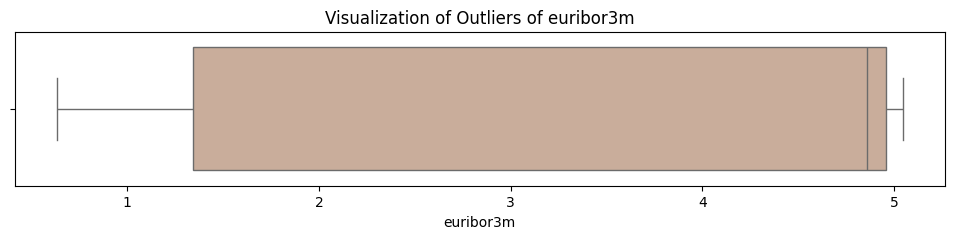

C:\Users\User\AppData\Local\Temp\ipykernel_28600\1316613273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_skew[col], palette='pink')


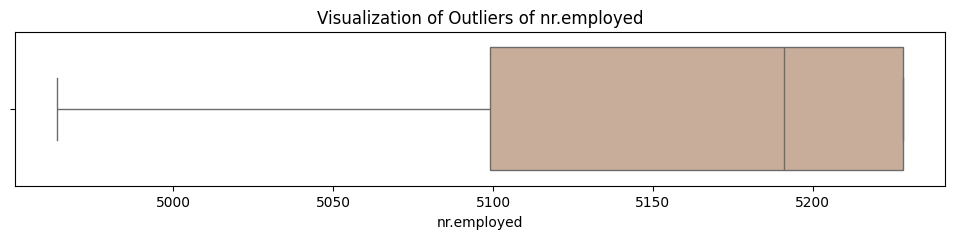

In [39]:
for col in df_eda_num_skew:
    #membuat perulangan unttuk setiap data didalam dataset
    plt.figure(figsize=(12,2))
    sns.boxplot(x=df_eda_num_skew[col], palette='pink')
    plt.title(f'Visualization of Outliers of {col}')
    plt.show()

Dapat dilihat terdapat anomali untuk feature pdays dan previous yakni : 
* previous dia memiliki outliers yang menumpuk dimana bisa dikatakan yang memilki value 0 dapat dilihat pada distribusi data
* previous dia memilki outliers yang konsisten setiap titik dikarenakan variance pada feature ini cenderung kecil tetapi value yang dimilki kecil dan cenderung menumpuk disalah satu fitur saja sehingga memilki pola seperti itu

### 4.5.2 Distribusi Normal

Dalam bagian ini akan mengecek menggunakan distribusi normal dengan metode Z-Score

In [40]:
#membuat variable untuk menampung data
listItem = []

for col in df_eda_num_norm:
    #menggunakan metode Z-Score karena distribusi Normal
    #menggunakan rumus Z-Score
    avg = df_eda_num_norm[col].mean()
    std = df_eda_num_norm[col].std()
    up_bound = avg + 3*std
    low_bound = avg - 3*std
    outlier = df_eda_num_norm[col][(df_eda_num_norm[col]<low_bound) | (df_eda_num_norm[col]>up_bound)] #deklarasi untuk menampung data outlier
    no_outlier = df_eda_num_norm[col][(df_eda_num_norm[col]>=low_bound) & (df_eda_num_norm[col]<=up_bound)] #deklarasi untuk menampung data bersih
    percentage = len(outliers)*100/len(df_eda_num_norm[col])
    listItem.append([col, percentage])
#convert to dataframe
outliers_df_norm = pd.DataFrame(columns=['Feature','Outliers'], data=listItem)
outliers_df_norm

,Feature,Outliers
0,cons.price.idx,0.0
1,cons.conf.idx,0.0


C:\Users\User\AppData\Local\Temp\ipykernel_28600\259127924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_norm[col], palette='pink')


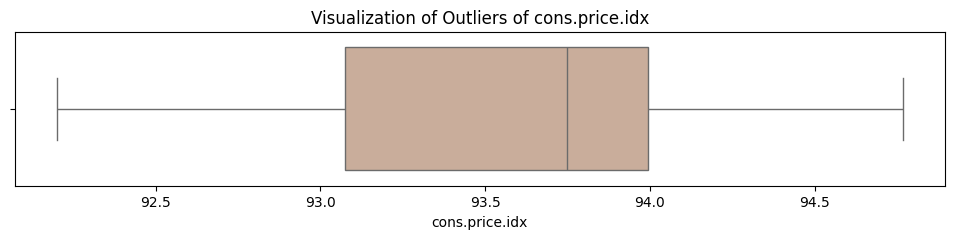

C:\Users\User\AppData\Local\Temp\ipykernel_28600\259127924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda_num_norm[col], palette='pink')


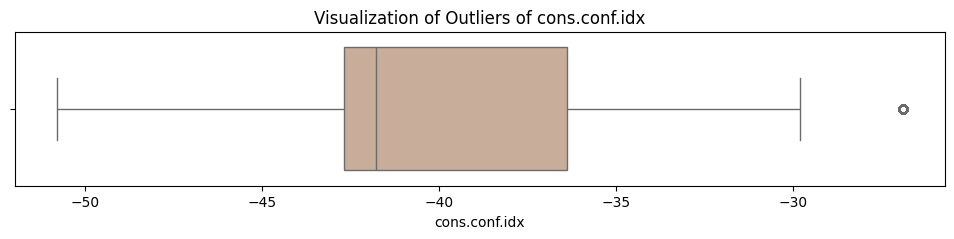

In [41]:
for col in df_eda_num_norm:
    #membuat perulangan unttuk setiap data didalam dataset
    plt.figure(figsize=(12,2))
    sns.boxplot(x=df_eda_num_norm[col], palette='pink')
    plt.title(f'Visualization of Outliers of {col}')
    plt.show()

Dalam data normal dapat dilihat bahwaanya tidak ada ourliersnya

## 4.6 Korelasi Fitur 

Pada Bagian ini akan mengecek korealasi dengan beberapa pendekatan berdasarkan type dataset

### 4.6.1 Korelasi antar fitur

Untuk bagian ini akan mengecek korelasi antar fitur

#### 4.6.1.1 Korelasi Antar Fitur Numerik

In [42]:
#menggunakan spearman karena kebnyakn berdistribusi skew
corr_feature = df_eda_num.corr('spearman')
corr_feature

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.002123,0.005715,-0.001062,-0.012643,0.045003,0.044790,0.114536,0.054391,0.044789
duration,-0.002123,1.000000,-0.080953,-0.083072,0.042407,-0.069201,0.002854,-0.008678,-0.078346,-0.095225
campaign,0.005715,-0.080953,1.000000,0.055514,-0.087420,0.156360,0.096494,-0.001554,0.140512,0.144264
pdays,-0.001062,-0.083072,0.055514,1.000000,-0.509583,0.227698,0.056763,-0.077265,0.278488,0.290673
previous,-0.012643,0.042407,-0.087420,-0.509583,1.000000,-0.435293,-0.282720,-0.115967,-0.454724,-0.438721
emp.var.rate,0.045003,-0.069201,0.156360,0.227698,-0.435293,1.000000,0.664890,0.224693,0.939915,0.944702
cons.price.idx,0.044790,0.002854,0.096494,0.056763,-0.282720,0.664890,1.000000,0.245633,0.490970,0.464738
cons.conf.idx,0.114536,-0.008678,-0.001554,-0.077265,-0.115967,0.224693,0.245633,1.000000,0.236646,0.132707
euribor3m,0.054391,-0.078346,0.140512,0.278488,-0.454724,0.939915,0.490970,0.236646,1.000000,0.928857
nr.employed,0.044789,-0.095225,0.144264,0.290673,-0.438721,0.944702,0.464738,0.132707,0.928857,1.000000


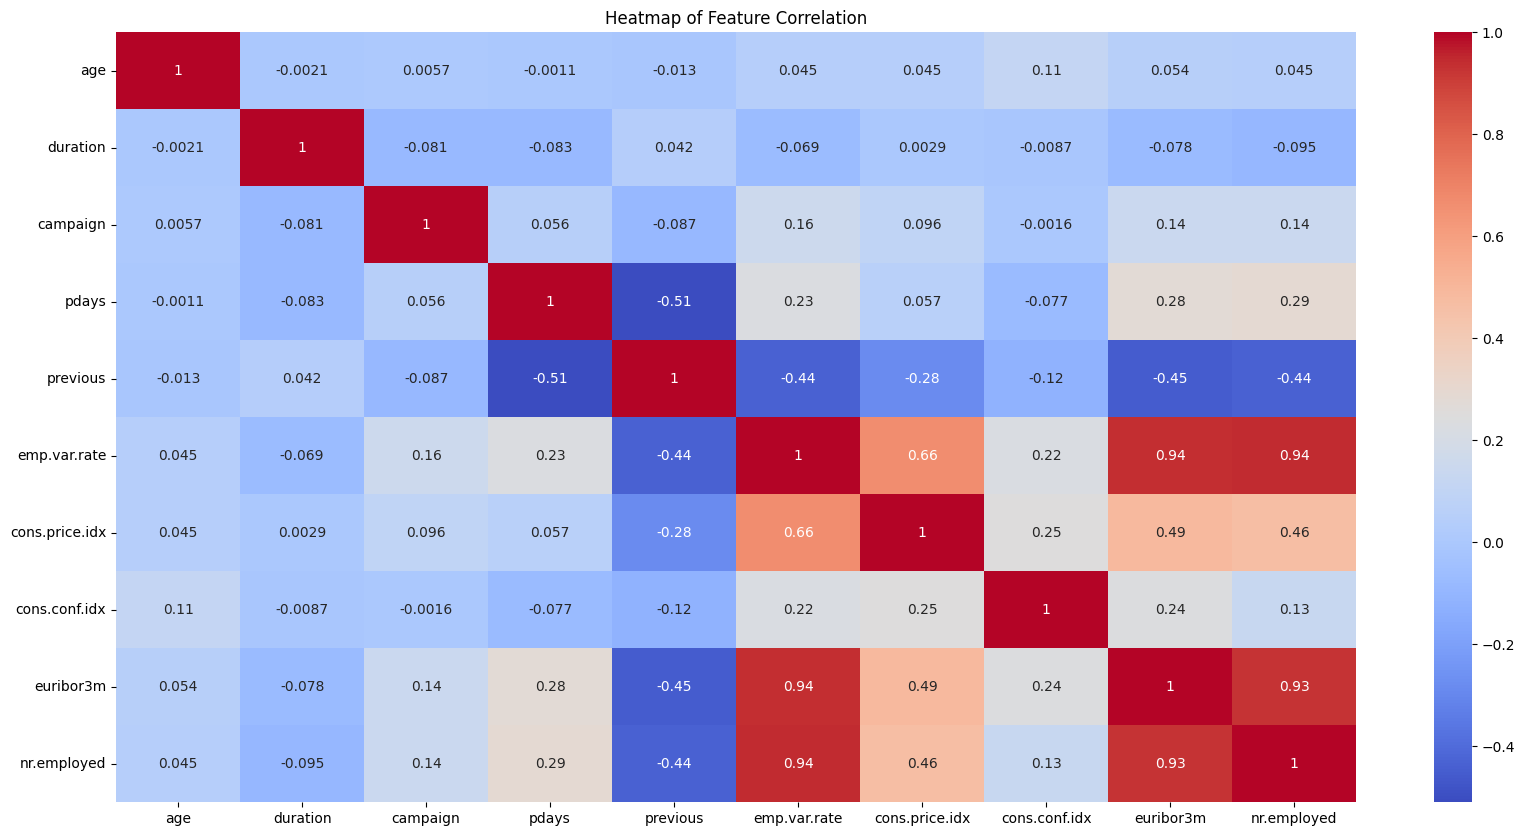

In [43]:
#membuat plot dengan heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_feature, annot=True, cmap='coolwarm',cbar=True)
plt.title('Heatmap of Feature Correlation')
plt.show()

Hasil dari pengecekan korealsi ada beberapa fitur yang memilki korelasi satu dengan yang lainnya 

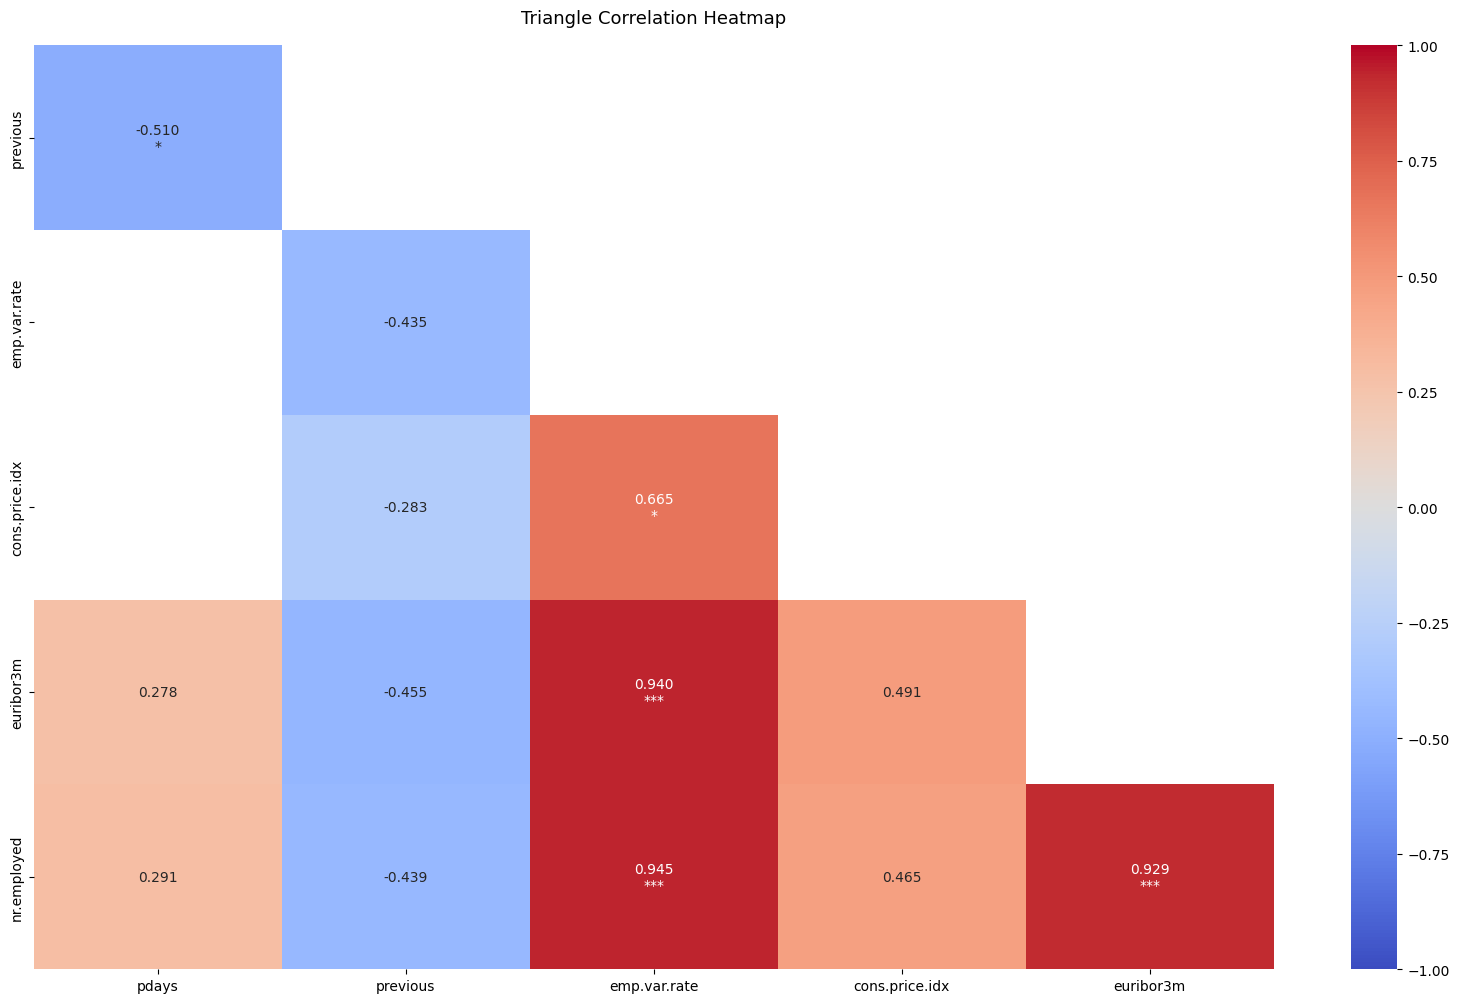

In [44]:
#pengecekkan korelasi yang dimana ditampilkan hanya untuk memiliki korelasi dengan minimum score 0.25 smpai -0.25
corr = df_eda_num.corr(method='spearman')
f, ax = plt.subplots(figsize=(20, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.3f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 13}, pad=16)
plt.show()

Dapat dilihat dari hasil diatas terdapat 5 feature numerik yang memiliki korealsi satu dengan yang lainnya sehingga dalam kasus prediksi kali ini lebih baik tidak menggunakan model yang memilki suatu asumsi terhadap no multi korelasi

#### 4.6.1.2 Korelasi Antar Fitur Kategorikal

Karena Kategori dengan kategori maka menggunakan chisquare dan juga menggunkan Cramer's untuk bisa mengetahui seberapa besar korelasi terhadap satu fitur dengan fitur lainnya

In [45]:
df_eda_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [46]:
# Fungsi untuk menghitung Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

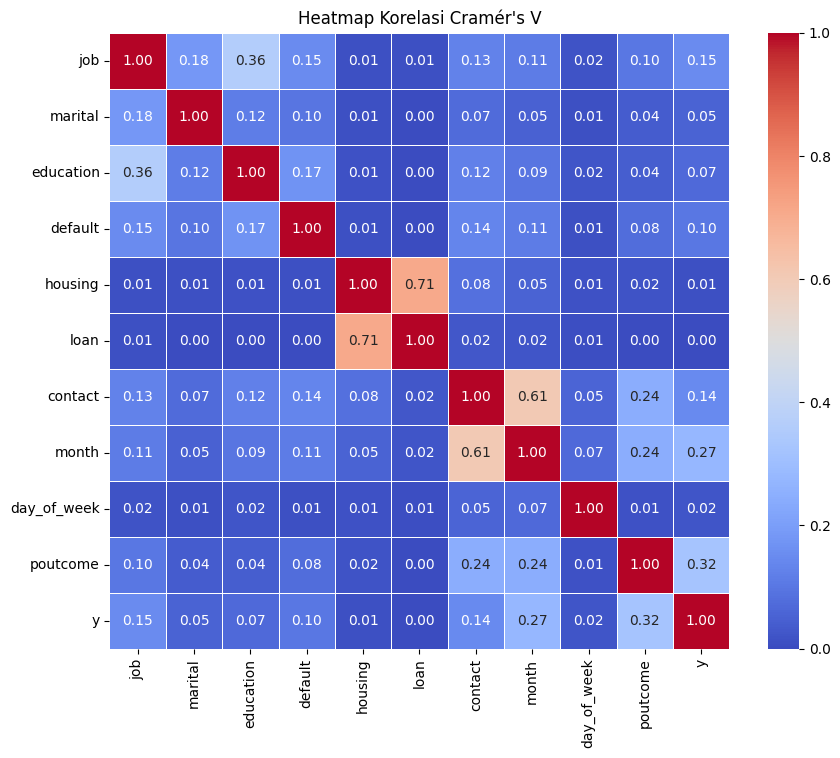

In [47]:
# Menghitung matriks Cramér's V
columns = df_eda_cat.columns
corr_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        corr_matrix.loc[col1, col2] = cramers_v(df_eda_cat[col1], df_eda_cat[col2])

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Heatmap Korelasi Cramér's V")
plt.show()

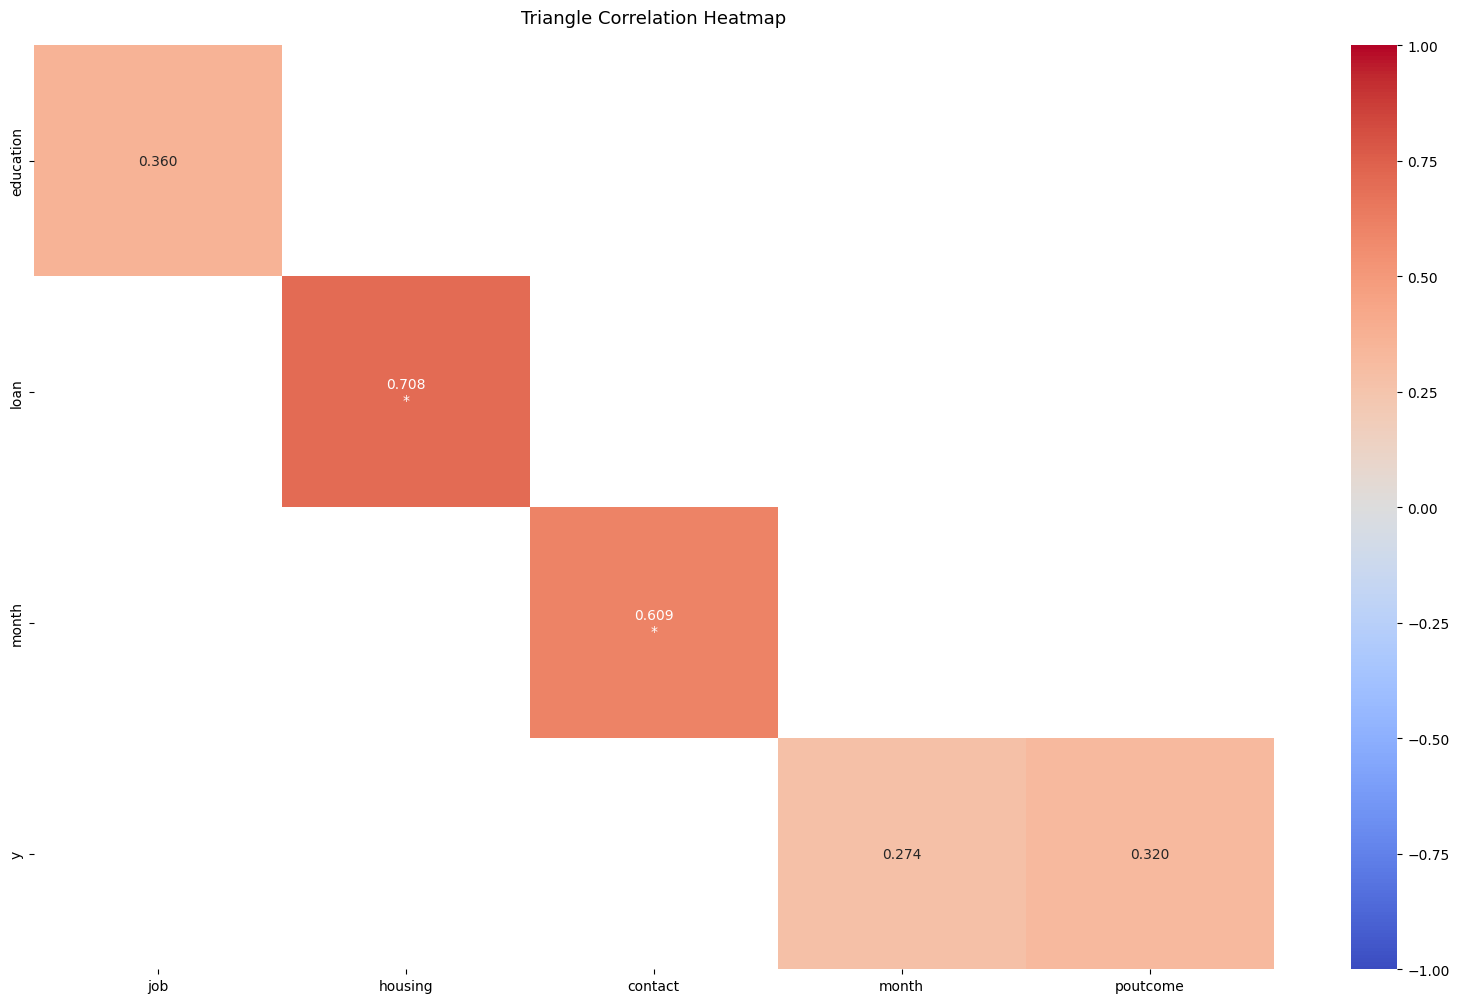

In [48]:

f, ax = plt.subplots(figsize=(20, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr_matrix) < cut_off
corr_matrix = corr_matrix[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr_matrix = corr_matrix.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.3f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr_matrix.to_numpy()]
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=annot, fmt='', cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 13}, pad=16)
plt.show()

apabila dilihat dalam kolom fitur cenderung tidak memiliki multi korelasi kecuali pada month dan poutcome

### 4.6.2 Korelasi Fitur Dengan Target

Dalam hal ini terdapat 2 Korelasi tergantung pada tipe datanya yakni numerik dan kategorik

#### 4.6.2.1 Korelasi Target Numerik

Pada bagian ini akan menggunakan pendekatan KendalTau dari Scipy karena akan menguji antara numerik dan kategorik

In [49]:
#mengambil data target
target = df_eda['y']
#convert ke dataframe
df_target = pd.DataFrame(target)
#merged data
merged_num_tar = pd.concat([df_eda_num,df_target],axis=1)
#convert yes no menjadi 0 dan 1 untuk cek korelasi
merged_num_tar['y'] = merged_num_tar['y'].map({'yes':1,'no':0})
merged_num_tar.head(2)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [50]:
#membuat var untuk meanmpung
listItem = [] 

#membuat fungsi untuk mengecek kolerasi kendal terhdap Exited
def corr(col):
  tmp = merged_num_tar.groupby(col)[['y']].mean().reset_index()
  tau, pval = stats.kendalltau(tmp[col],tmp['y'])
  result = 0
  if pval < 0.05:
        result = 'Berkaitan'
  else:
        result = 'Tidak Berkaitan'
  listItem.append([col, tau, pval,result])


for i in df_eda_num.columns:
    corr(i)

#convert ke dataframe
corr_target = pd.DataFrame(columns=['Feature','Nilai Kendal','P-value','Hasil'], data=listItem)
corr_target

,Feature,Nilai Kendal,P-value,Hasil
0,age,0.267467,5.390466e-04,Berkaitan
1,duration,0.470982,9.191040e-159,Berkaitan
2,campaign,-0.706478,1.889372e-09,Berkaitan
3,pdays,0.032079,8.176342e-01,Tidak Berkaitan
4,previous,0.357143,2.750992e-01,Tidak Berkaitan
5,emp.var.rate,-0.600000,1.666612e-02,Berkaitan
6,cons.price.idx,0.052308,7.269745e-01,Tidak Berkaitan
7,cons.conf.idx,0.076923,6.002720e-01,Tidak Berkaitan
8,euribor3m,-0.295302,7.970328e-15,Berkaitan
9,nr.employed,-0.745455,7.595298e-04,Berkaitan


In [51]:
corr_target_kaitan = corr_target[corr_target['Hasil'] == 'Berkaitan']
corr_target_kaitan['Feature']

0             age
1        duration
2        campaign
5    emp.var.rate
8       euribor3m
9     nr.employed
Name: Feature, dtype: object

Dari hasil diatas dapat dilihat bahwasanya yang memilki korelasi terhadap target adalah : 
1. Age
2. duration
3. campaign
4. emp.var.rate
5. euribor3m
6. nr.employed

#### 4.6.2.2 Korelasi Target Kategorik

menggunakan chisquare karena keduanya bertipe kategorik

In [52]:
#buat var untuk menampung
listItem = []
#perualangan untuk langsung mengecek seluruh data categorical
for col in df_eda_cat:
    cross = pd.crosstab(df_eda_cat[col],df_eda_cat['y'])
    pval = stats.chi2_contingency(cross).pvalue
    hasil = 0
    if hasil <0.05:
        hasil = 'Berkaitan'
    else:
        hasil = 'Tidak Berkaitan'
    #append data ke list
    listItem.append([col, pval, hasil])

#convert data
corr_target_cat = pd.DataFrame(columns=['Feature','P-value','Hasil'], data=listItem)
corr_target_cat
    
    

,Feature,P-value,Hasil
0,job,4.189763e-199,Berkaitan
1,marital,2.068015e-26,Berkaitan
2,education,3.305189e-38,Berkaitan
3,default,5.161958e-89,Berkaitan
4,housing,5.829448e-02,Berkaitan
5,loan,5.786753e-01,Berkaitan
6,contact,1.525986e-189,Berkaitan
7,month,0.000000e+00,Berkaitan
8,day_of_week,2.958482e-05,Berkaitan
9,poutcome,0.000000e+00,Berkaitan


Dapat dilihat dari hasil diatas bahwasanya semua kolom categorical memilki korelasi dengan Target apabila metode pengukurannya chisquare

## 4.7 Kesimpulan EDA

In [53]:
df_eda_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Kesimpulan yang didapatkan dalam eda ada beberapa hal yakni : 
1. Data ini memilki outliers yang cenderung besar sehingga perlu dihandling terlbih dahulu sebelum dimodelkan
2. Data ini memiilki duplikasi yang kecil hanya 0,0002 sehingga apabila di drop tidak memilki pengaruh yang besar
3. Data ini memilki Multi Korelasi sehingga apabila diberikan model yang ada asumsi no multi correlation maka kecenderungan terhadap hasil akan tidak terlalu bagus
4. Data ini memilki Korelasi terhadap target sebagai berikut : 
    * Data Kategorik : 
        * 'job', 
        * 'marital', 
        * 'education', 
        * 'default', 
        * 'housing', 
        * 'loan', 
        * 'contact',
        * 'month', 
        * 'day_of_week', 
        * 'poutcome'
    * Data Numerik : 
        * age
        * duration
        * campaign
        * emp.var.rate
        * euribor3m
        * nr.employed

sehingga dalam pembuatan model kedepannya akan menggunakan fitur fitur yang memilki korelasi terhadap target

# 5. Feature Engineering

In [54]:
df_fe = df_ori.copy()
df_fe.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dalam bagian ini merupakan tahapan untuk memproses data terlebih dahulu sebelum masuk dibagaian modeling sehingga bisa memeberikan pengaruh performa model yang lebih bagus, dan note penting karena tidak ada null values maka tidak akan diberikan handling null values

## 5.1 Handling Duplicate Data

Seperti yang kita ketahui dalam dataset ini memilki duplikasi data sebesar 0,00002 sehingga langkah penanganannya adalah dengan drop duplikate data

In [56]:
df_fe.drop_duplicates(inplace=True)
df_fe.duplicated().sum()

0

## 5.2 Splitting Dataset

dalam bagian ini akan melakukan splitting dataset yang memiliki persesntase 8:2 antara Train : Tes


In [57]:
#splititng dataset

X = df_fe.drop('y', axis=1) #data train
y = df_fe['y']  #dataa test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200) #splitting dengan random state serta pembagian train tes 8:2
print(f'X_train = {X_train.shape}')
print(f'y_train = {y_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_test = {y_test.shape}')


X_train = (32940, 20)
y_train = (32940,)
X_test = (8236, 20)
y_test = (8236,)


## 5.3 Handling Extreme Values

Dalam bagian ini akan handle extrme values dengan kolom numerik saja serta diberikan metode sesuai dengan distribusinya

In [58]:
#pengecekkan nilai skew pada setiap data numerik
num_col = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

listItem = []
for col in num_col:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(listItem, columns=['Column', 'Skew']).sort_values(by='Skew')

,Column,Skew
3,pdays,-4.815176
9,nr.employed,-1.052474
5,emp.var.rate,-0.727441
8,euribor3m,-0.714600
6,cons.price.idx,-0.237920
7,cons.conf.idx,0.299949
0,age,0.788888
1,duration,3.327575
4,previous,3.789297
2,campaign,4.827015


In [59]:
#membeuat var untuk list distribusi normal dan skew untuk mempermudah handling sesuai tipe datanya
listNorm = [] 
listSkew = []

for col in listItem:
  if col[1] > 0.5 or col[1] < -0.5:
    listSkew.append(col[0])
  else:
    listNorm.append(col[0])

print(f'Skew: {listSkew}')
print(f'Normal: {listNorm}')

Skew: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']
Normal: ['cons.price.idx', 'cons.conf.idx']


Dari hasil diatas kita mengetahui ada 2 golongan distribusi yakni skew dan normal sehingga akan di olah berbeda setiap golongannya. Perlu diingat dikarenakan tidak adanya outliers terhadap data Normal ketika di cek di EDA maka tidak ada handling terhadap Distribusi normal tetapi hanya skew saja

### 5.3.1 Metode Capping IQR

Dalam kasus ini tidak akan menggunakan data previous dan pdays karena berdasarkan data tersebut memang di setting menjadi angka tersebut untuk kasus pdays apabila belum pernah bertemu dengan orang

In [60]:
print(f'Skew: {listSkew}')

Skew: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']


In [61]:
# Menghapus kolom 'pdays' dan 'previous' dari daftar kolom yang akan dicapping
listSkewIQR = [col for col in listSkew if col not in ['pdays', 'previous']]

In [62]:
#hanling untuk distribusi skew dengan method iqr teknik capping
winsoriser_skew = Winsorizer(capping_method='quantiles',
                            tail='both',
                            fold=0.1,  # Menggunakan 5% untuk quantiles
                            variables= listSkewIQR)
X_train_capped = winsoriser_skew.fit_transform(X_train)
X_test_capped = winsoriser_skew.transform(X_test)


In [63]:
def diagnostic_plots(df, variable):
    #membuat funngsi untuk membuat visualisasi dari Hasil Handle outnlers dan tidak handle outliers


    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

age - Before Capping


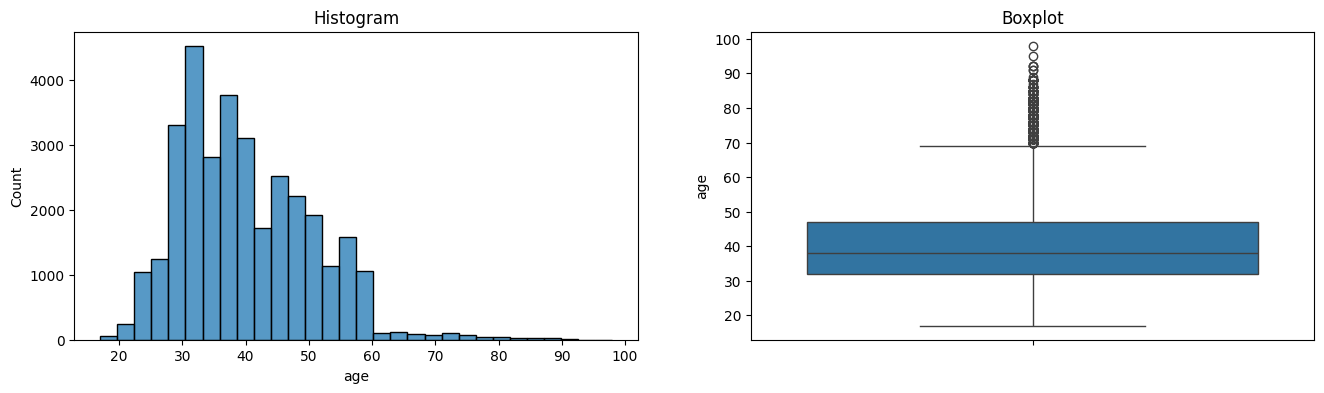


age - After Capping


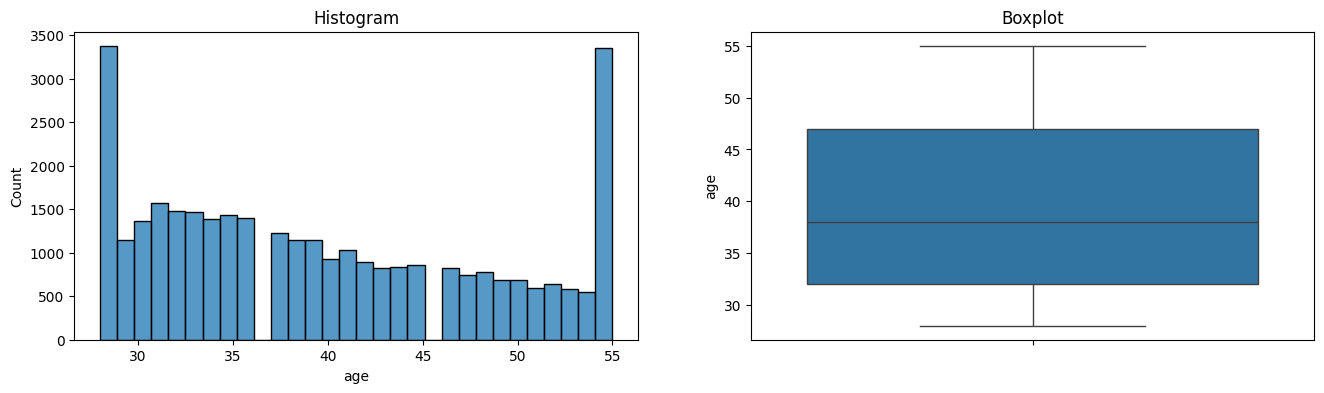

duration - Before Capping


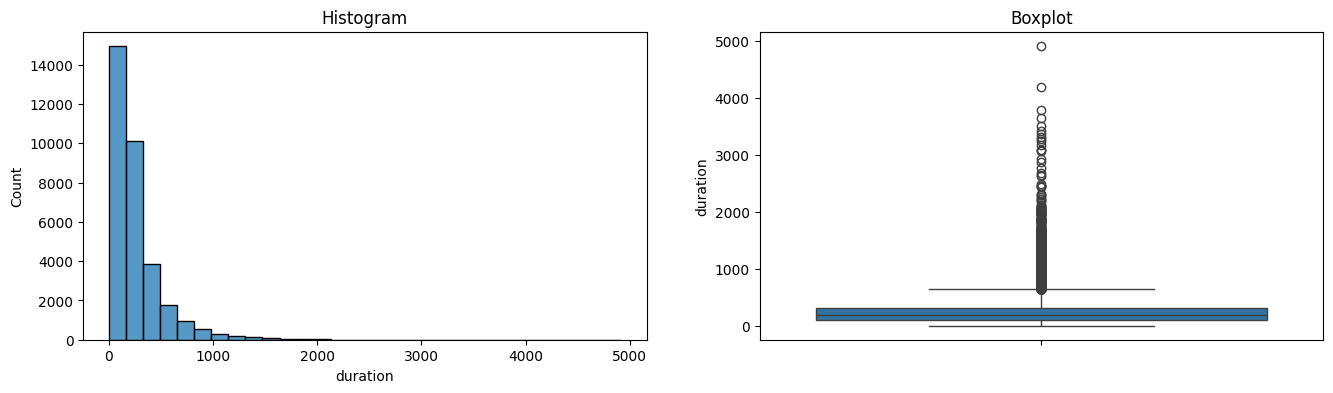


duration - After Capping


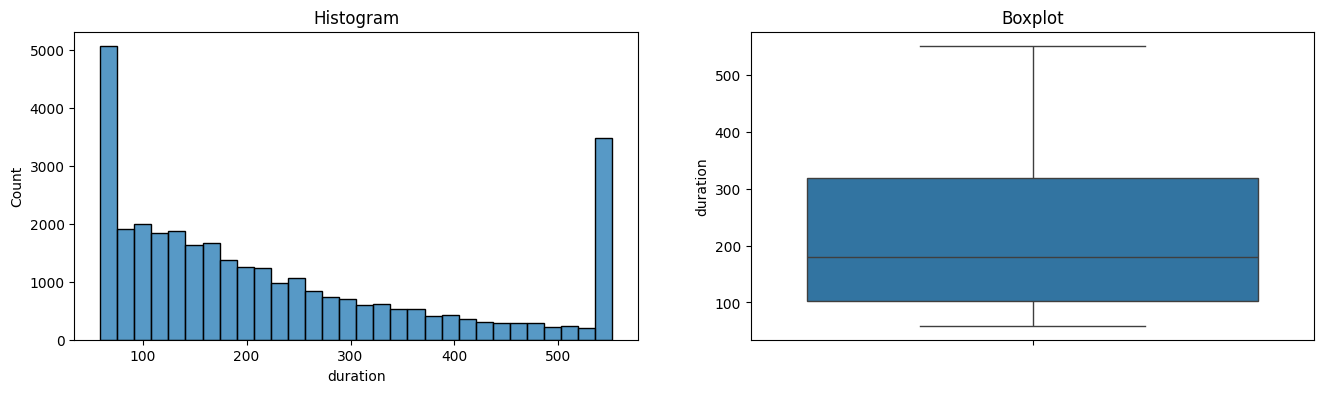

campaign - Before Capping


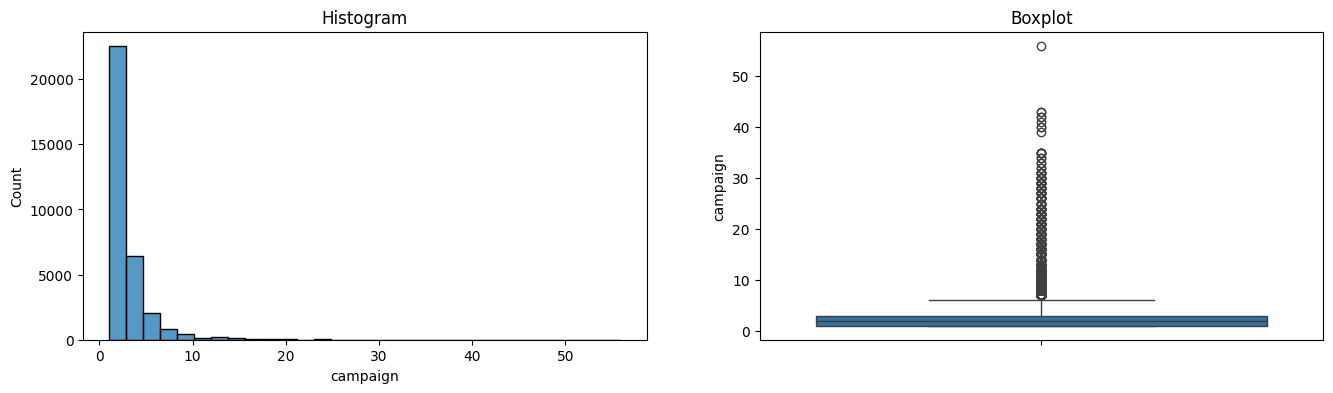


campaign - After Capping


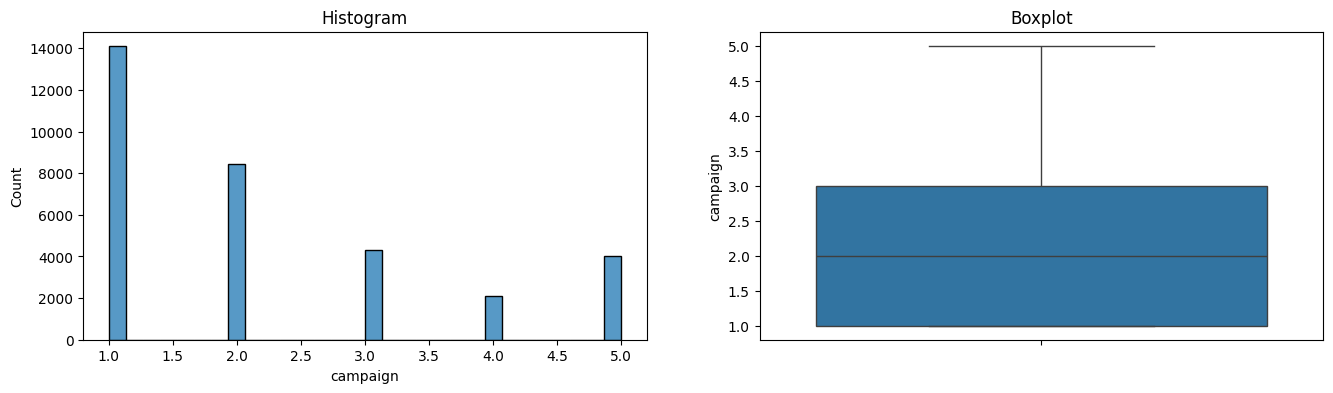

emp.var.rate - Before Capping


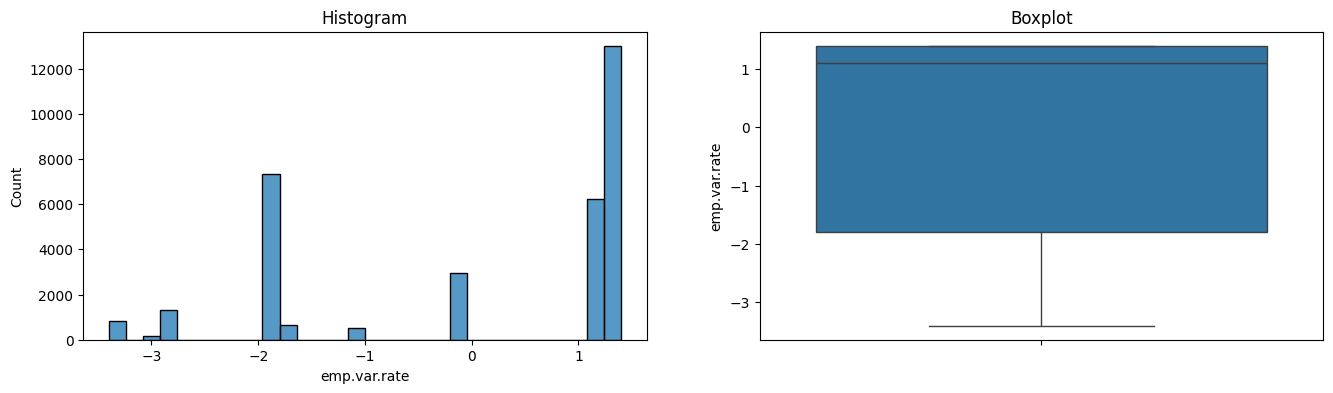


emp.var.rate - After Capping


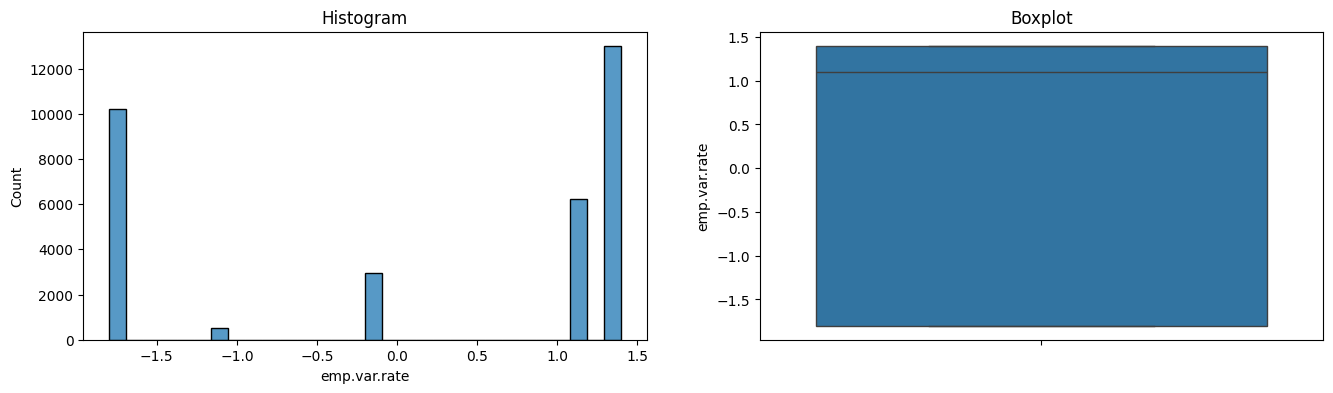

euribor3m - Before Capping


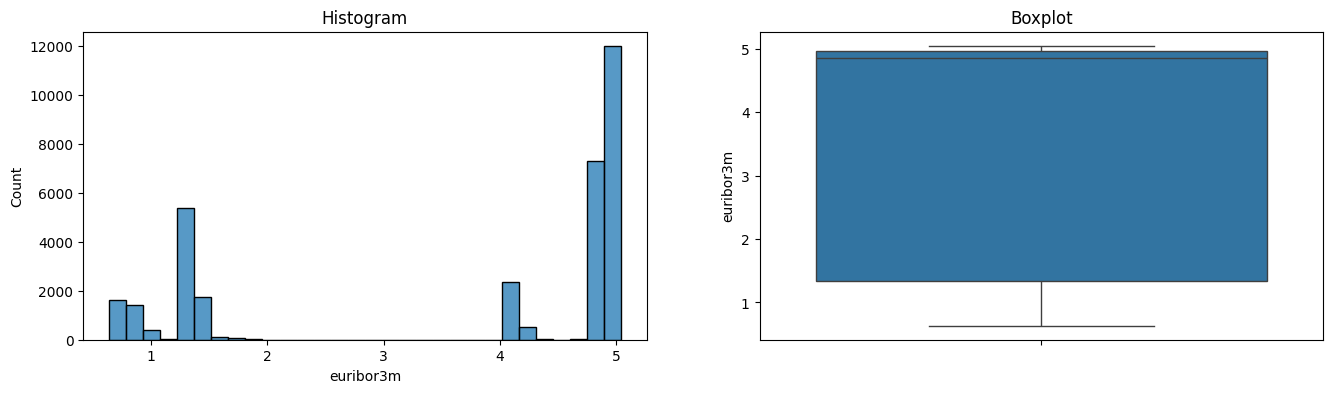


euribor3m - After Capping


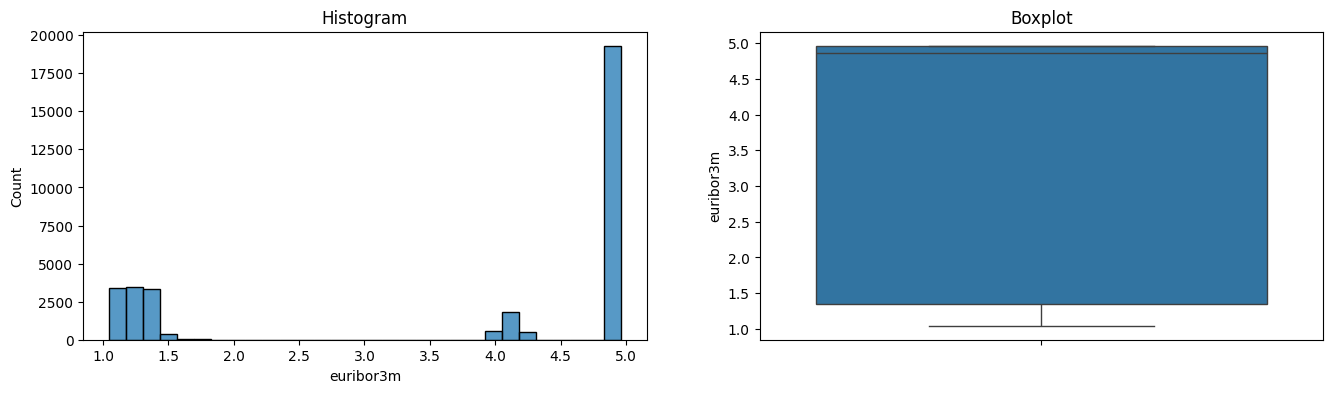

nr.employed - Before Capping


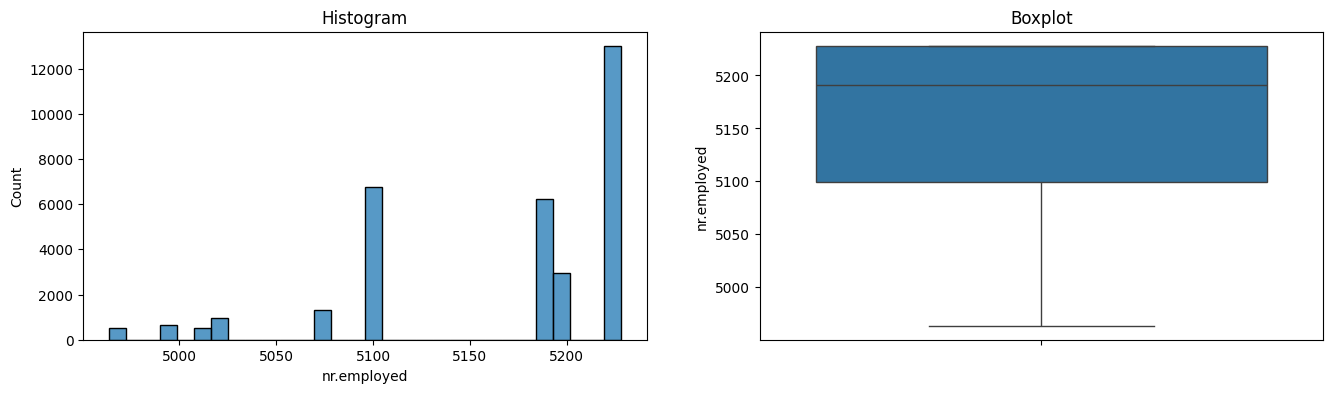


nr.employed - After Capping


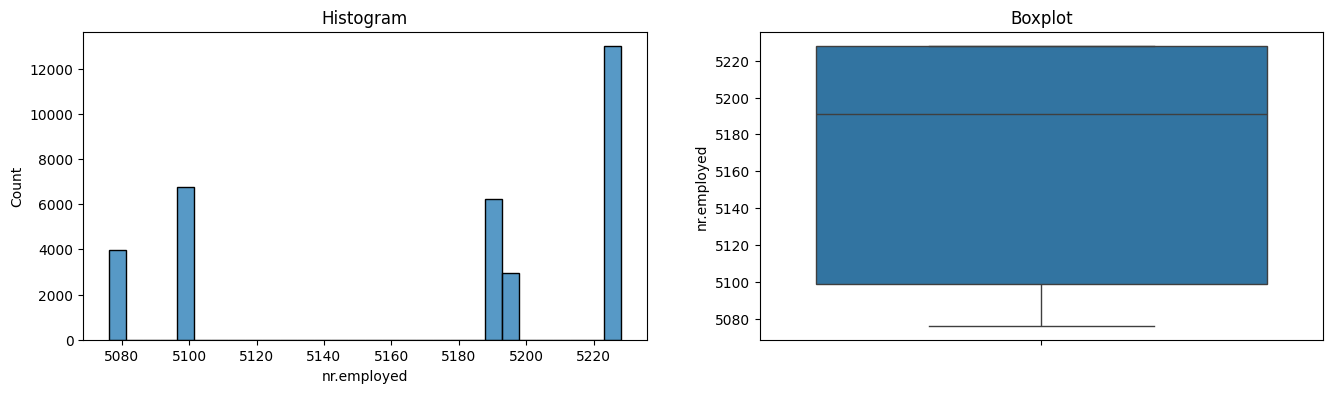

In [64]:
# Check the distribution before and after capping
for col in listSkewIQR:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

Dapat dilihat dsetelah diberikan handling data sudh menjadi bersih dari outliers dengan metode CAPPING

### 5.3.3 Metode Gausian 

Untuk kasus pdays akan dipaksakan menggunakan gausian karena sudah tidak bisa menggunakan metode quantile aataupun iqr

In [52]:
#hadnling distribusi normal
winsoriser_norm = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3, 
                            variables='pdays'
                            ,missing_values='ignore')
X_train_capped = winsoriser_norm.fit_transform(X_train_capped) #train akan di fit_transfrom
X_test_capped = winsoriser_norm.transform(X_test_capped) #tes hanya akan di transform saja

pdays - Before Capping


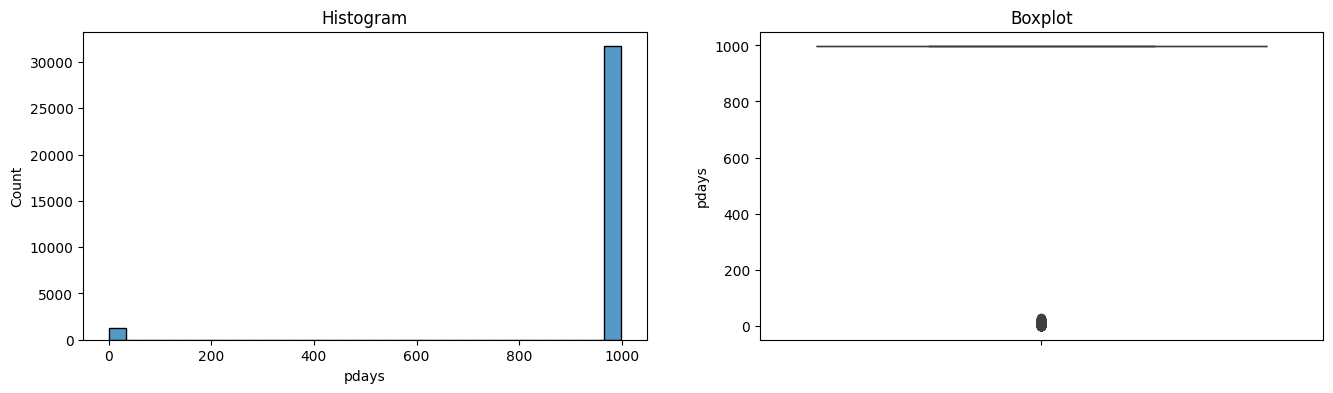


pdays - After Capping


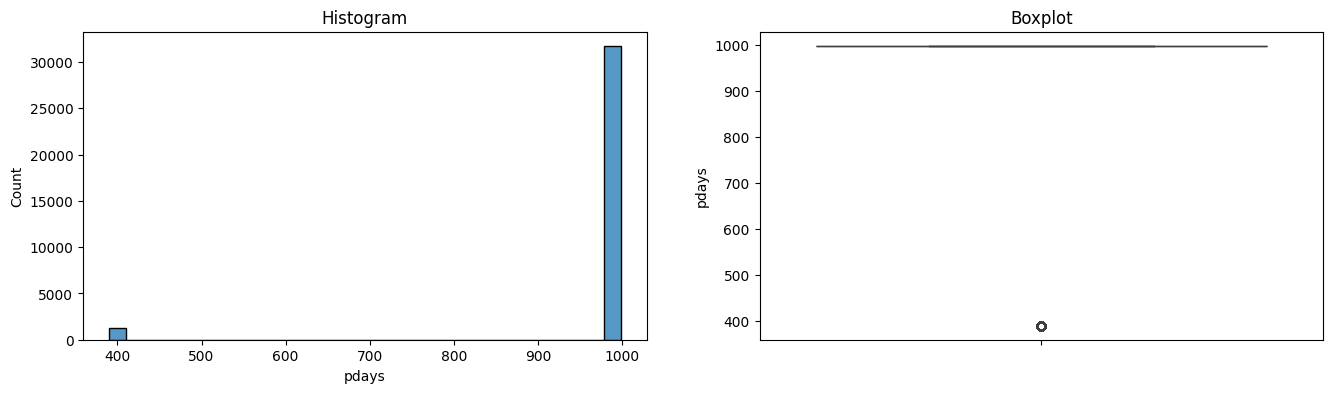

In [53]:
a = ['pdays']
# Check the distribution before and after capping
for col in a:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

## 5.4 Pengelompokkan Dataset

Pada bagian ini akan mengelompokkan dataset sesuai dengan type pada data

In [65]:
## pengelompokan antara tipe numerical dan categorical

num_columns = X_train_capped.select_dtypes(include = np.number).columns.tolist() #numerik
cat_columns = X_train_capped.select_dtypes(include = ['object']).columns.tolist() #kategiri

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [66]:
#membuat var baru X_train_num dan X_train_cat yang berisikan sesuai dengan typenya
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

#penerapan ke X_test juga
X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

## 5.5 Feature Selection

Pada bagian ini akan memilih feature apa saja yang akan digunakan untuk di modelkan sehingga diperlukan feature selection berdasarkan korelasi terhadap target seperti di EDA tetapi dengan kasus data yang sudah dibersihkan. Serta akan mengecek perbandingan terhadap pembersihan outliers apakah mempengaruhi korelasi terhadap data atau tidak 

### 5.5.1 Feature Numerik

Dalam bagian ini akan mengecek secara langsung menggunakan kendal seperti pada EDA

In [67]:
#convert ke dataframe dengan menampung di dataset baru
df_target = pd.DataFrame(y_train)
#merged data
merged_numerik = pd.concat([X_train_num,df_target],axis=1)
#convert yes no menjadi 0 dan 1 untuk cek korelasi
merged_numerik['y'] = merged_numerik['y'].map({'yes':1,'no':0})
merged_numerik.head(2)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29194,42,130,1,999,1,-1.8,93.075,-47.1,1.405,5099.1,0
39567,28,180,2,999,0,-1.8,93.749,-34.6,1.044,5076.2,0


In [68]:
#membuat var untuk meanmpung
listItem = [] 

#membuat fungsi untuk mengecek kolerasi kendal terhdap Exited
def corr(col):
  tmp = merged_numerik.groupby(col)[['y']].mean().reset_index()
  tau, pval = stats.kendalltau(tmp[col],tmp['y'])
  result = 0
  if pval < 0.05:
        result = 'Berkaitan'
  else:
        result = 'Tidak Berkaitan'
  listItem.append([col, tau, pval,result])


for i in df_eda_num.columns:
    corr(i)

#convert ke dataframe
corr_target = pd.DataFrame(columns=['Feature','Nilai Kendal','P-value','Hasil'], data=listItem)
corr_target

,Feature,Nilai Kendal,P-value,Hasil
0,age,-0.285714,3.361156e-02,Berkaitan
1,duration,0.595491,1.261854e-86,Berkaitan
2,campaign,-1.000000,1.666667e-02,Berkaitan
3,pdays,-0.043548,7.570866e-01,Tidak Berkaitan
4,previous,0.619048,6.904762e-02,Tidak Berkaitan
5,emp.var.rate,-0.714286,3.015873e-02,Berkaitan
6,cons.price.idx,0.058462,6.944365e-01,Tidak Berkaitan
7,cons.conf.idx,0.058462,6.944365e-01,Tidak Berkaitan
8,euribor3m,-0.137603,2.598051e-02,Berkaitan
9,nr.employed,-0.733333,5.555556e-02,Tidak Berkaitan


In [69]:
corr_fe_num = corr_target[corr_target['Hasil'] == 'Berkaitan']
corr_fe_num['Feature'] # untuk data yang sudah di handling extreme values

0             age
1        duration
2        campaign
5    emp.var.rate
8       euribor3m
Name: Feature, dtype: object

In [70]:
#mengecek untuk data yang masih ada extreme values
corr_target_kaitan['Feature']

0             age
1        duration
2        campaign
5    emp.var.rate
8       euribor3m
9     nr.employed
Name: Feature, dtype: object

Dapat dilihar hasil dari uji korelasi mengalami perubahan setelah handling extreme values, sehingga dalam kasus ini extreme values dapat mempengaruhi korelasi pada target dengan hasil akhir hanya ada 5 data saja: 
0. age
1. duration
2. campaign
3. emp.var.rate
4. euribor3m

5.5.2 Feature Categoricall

Dalam kasus ini akan langsung saja menggunakan semua data karena pada dasarnya tidak ada yang dirubah terhadap data categorical sehingga tidak perlu mengulangi step yang ada di EDA

In [71]:
fe_cat_correlation = corr_target_cat[corr_target_cat['Hasil']=='Berkaitan']
fe_cat_correlation['Feature']

0             job
1         marital
2       education
3         default
4         housing
5            loan
6         contact
7           month
8     day_of_week
9        poutcome
10              y
Name: Feature, dtype: object

Dengan hasil akhir semua memilki korelasi terhadap target

### 5.5.3 Kesimpulan Feature Selection

Dalam kasus ini akan memilih fitur numerik : 
1. age
2. duration
3. campaign
4. emp.var.rate
5. euribor3m

Fitur Kategorik :
1. 'job',
2. 'marital',
3. 'education',
4. 'default',
5. 'housing',
6. 'loan',
7. 'contact',
8. 'month',
9. 'day_of_week',
10. 'poutcome' 

Dimana hasil ini berbeda dengan dari EDA 

In [77]:
#buat var baru berisikan list terhadap fitur yang telah dipilih
num_col_selected = ['age','duration','campaign','emp.var.rate','euribor3m']
cat_col_selected = cat_columns

#transform ke train 
X_train_num_selection = X_train_num[num_col_selected]
X_train_cat_selection = X_train_cat[cat_col_selected]

#transform ke test
X_test_num_selection = X_test_num[num_col_selected]
X_test_cat_selection = X_test_cat[cat_col_selected]

#cek
X_train_cat_selection

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
29194,blue-collar,single,unknown,no,yes,no,cellular,apr,fri,failure
39567,student,single,unknown,no,yes,yes,cellular,apr,fri,nonexistent
31093,admin.,married,high.school,unknown,yes,no,cellular,may,wed,failure
12266,blue-collar,divorced,high.school,no,yes,no,telephone,jul,thu,nonexistent
23292,technician,married,professional.course,no,no,no,cellular,aug,wed,nonexistent
...,...,...,...,...,...,...,...,...,...,...
30948,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,tue,failure
11344,admin.,married,high.school,unknown,no,yes,telephone,jun,thu,nonexistent
784,blue-collar,single,basic.6y,no,yes,no,telephone,may,wed,nonexistent
12907,management,married,university.degree,no,yes,no,cellular,jul,tue,nonexistent


## 5.6 Balancing Dataset

Pada Tahapan ini akan melakukan ballancing dataset dengan menggunakan metode SMOTENC yakni OVersampling terhadap Minoritas

In [78]:
#concate X_train 
X_train_selected = pd.concat([X_train_num_selection,X_train_cat_selection], axis=1)
y = pd.DataFrame(y_train)

In [79]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32940 entries, 29194 to 1819
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           32940 non-null  int64  
 1   duration      32940 non-null  int64  
 2   campaign      32940 non-null  int64  
 3   emp.var.rate  32940 non-null  float64
 4   euribor3m     32940 non-null  float64
 5   job           32940 non-null  object 
 6   marital       32940 non-null  object 
 7   education     32940 non-null  object 
 8   default       32940 non-null  object 
 9   housing       32940 non-null  object 
 10  loan          32940 non-null  object 
 11  contact       32940 non-null  object 
 12  month         32940 non-null  object 
 13  day_of_week   32940 non-null  object 
 14  poutcome      32940 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 4.0+ MB


In [80]:
categorical_columns = X_train_selected.select_dtypes(include=['object']).columns.to_list()
# Indeks kolom kategorikal
categorical_features = [X_train_selected.columns.get_loc(col) for col in categorical_columns]
#menggunakan SMOTENC
smotenc = SMOTENC(categorical_features=categorical_features, random_state=200, k_neighbors=5, sampling_strategy='minority')
#pisah menjadi 2 dataset yang berbeda
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_selected, y)
y_train_balanced.value_counts()

y  
no     29184
yes    29184
Name: count, dtype: int64

In [81]:
X_train_balanced

,age,duration,campaign,emp.var.rate,euribor3m,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,42,130,1,-1.800000,1.405000,blue-collar,single,unknown,no,yes,no,cellular,apr,fri,failure
1,28,180,2,-1.800000,1.044000,student,single,unknown,no,yes,yes,cellular,apr,fri,nonexistent
2,46,293,1,-1.800000,1.334000,admin.,married,high.school,unknown,yes,no,cellular,may,wed,failure
3,29,178,1,1.400000,4.964000,blue-collar,divorced,high.school,no,yes,no,telephone,jul,thu,nonexistent
4,44,59,5,1.400000,4.964000,technician,married,professional.course,no,no,no,cellular,aug,wed,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58363,39,552,3,1.400000,4.958826,admin.,married,basic.6y,no,no,no,telephone,jun,mon,nonexistent
58364,28,202,1,-1.724241,1.044000,student,single,high.school,no,yes,no,cellular,apr,tue,nonexistent
58365,47,362,1,-1.120304,1.044000,management,married,university.degree,no,yes,no,cellular,jul,thu,nonexistent
58366,37,552,1,-1.728082,1.123471,admin.,married,high.school,no,yes,no,cellular,may,thu,nonexistent


## 5.7 Columns Transformer

Pada bagian ini akan mengimplemtasikan pipeline sehingga proses akan lebih ringkas

In [82]:
#define final fitur yang diseleksi
num_col_selected = num_col_selected
ord_col_selected = ['education'] #fitur kategorik ordinal
nom_col_selected = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] #fitur kategorik nominal

In [83]:
#define scaling
scaler = MinMaxScaler()
#define 
encoder_nom = OneHotEncoder(handle_unknown='ignore')  # Mengabaikan kategori yang tidak ada di data training
#define urutan ordinal untuk kolom eductaion
education_order = [
    'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
    'professional.course', 'university.degree', 'unknown'
]
#Inisialisasi OrdinalEncoder dengan urutan yang ditentukan
encoder_ord = OrdinalEncoder(categories=[education_order])


In [84]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', scaler, num_col_selected),
('encoding nominal', encoder_nom, nom_col_selected),
('encoding ordinal', encoder_ord, ord_col_selected)
])

## 5.8 Concat Test Data

Pada bagian ini akan menggabungkan data test 

In [85]:
X_test_final = pd.concat([X_test_num_selection,X_test_cat_selection], axis=1)
X_test_final = pd.DataFrame(X_test_final)
print(X_test_final.shape)

(8236, 15)


In [86]:
X_test_final.shape

(8236, 15)

In [87]:
y_test = pd.DataFrame(y_test)

In [88]:
y_test.shape

(8236, 1)

# 6. Model Definition

Dalam kasus ini akan menggunakan 5 model baseline terlebih dahulu yakni : 
1. KNN 
2. SVM
3. Decision Tree
4. Random Forest
5. Boosting (CatBosting) dipilih karena algoritma ini tidak memerlukan data target yang numerik

In [89]:
#membuat pipeline untuk KNN
pipe_knn = Pipeline([
    ('transformer', transformer),
    ('classifier', KNeighborsClassifier())
])
#membuat pipeline untuk SVM
pipe_svc = Pipeline([
    ('transformer', transformer),
    ('classifier', SVC())]
)
#membuat pipeline untuk Decision Tree
pipe_dt = Pipeline([
    ('transformer', transformer),
    ('classifier', DecisionTreeClassifier())
])
#membuat pipeline untuk Random Forest
pipe_rf = Pipeline([
    ('transformer', transformer),
    ('classifier', RandomForestClassifier())
])
# Membuat pipeline untuk CatBoosting
pipe_cb = Pipeline([
    ('transformer', transformer),
    ('classifier', CatBoostClassifier(verbose=0))  
])

# 7. Model Training

In [116]:
#train KNN
pipe_knn.fit(X_train_balanced,y_train_balanced)
#train SVM
pipe_svc.fit(X_train_balanced,y_train_balanced)
#tain Decision Tree
pipe_dt.fit(X_train_balanced,y_train_balanced)
#train Random Forest
pipe_rf.fit(X_train_balanced,y_train_balanced)
#train CatBoosting
pipe_cb.fit(X_train_balanced,y_train_balanced)


c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Learning rate set to 0.058491
0:	learn: 0.6265806	total: 10.3ms	remaining: 10.3s
3:	learn: 0.4848061	total: 124ms	remaining: 30.9s
6:	learn: 0.4066856	total: 254ms	remaining: 36s
9:	learn: 0.3564780	total: 362ms	remaining: 35.8s
12:	learn: 0.3256566	total: 494ms	remaining: 37.5s
15:	learn: 0.3029744	total: 644ms	remaining: 39.6s
18:	learn: 0.2884590	total: 794ms	remaining: 41s
21:	learn: 0.2752181	total: 908ms	remaining: 40.4s
24:	learn: 0.2666148	total: 975ms	remaining: 38s
27:	learn: 0.2597076	total: 1.04s	remaining: 36.2s
30:	learn: 0.2533922	total: 1.14s	remaining: 35.6s
33:	learn: 0.2478232	total: 1.21s	remaining: 34.3s
36:	learn: 0.2434529	total: 1.29s	remaining: 33.6s
39:	learn: 0.2393888	total: 1.41s	remaining: 33.8s
42:	learn: 0.2356522	total: 1.51s	remaining: 33.5s
45:	learn: 0.2331377	total: 1.57s	remaining: 32.6s
48:	learn: 0.2292682	total: 1.72s	remaining: 33.4s
51:	learn: 0.2266073	total: 1.79s	remaining: 32.7s
54:	learn: 0.2218069	total: 1.92s	remaining: 33s
57:	learn: 0

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'emp.var.rate',
                                                   'euribor3m']),
                                                 ('encoding nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('encoding ordinal',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree',
                                                                              'unknown']]),
                                                  ['education'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000238945A76D0>)])

# 8. Baseline Evaluation

Dalam tahapan ini akan mengecek performa terhadap baseline model yang telah dimodel

In [91]:
# Save Classification Report into a Dictionary
all_reports = {}
def performance_report(all_reports, model,y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
        'Train - f1_score': f1_score(y_train, y_pred_train, pos_label='yes'),
        'Test - f1_score': f1_score(y_test, y_pred_test, pos_label='yes'),
        'Train - F1 Mean - Cross Validation': cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1_macro').mean(),
        'Train - F1 Std - Cross Validation': cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1_macro').std()
  }
  all_reports[name] = score_reports
  return all_reports

## 8.1 Baseline Model KNN

              precision    recall  f1-score   support

          no       0.95      0.89      0.92     29184
         yes       0.90      0.95      0.92     29184

    accuracy                           0.92     58368
   macro avg       0.92      0.92      0.92     58368
weighted avg       0.92      0.92      0.92     58368



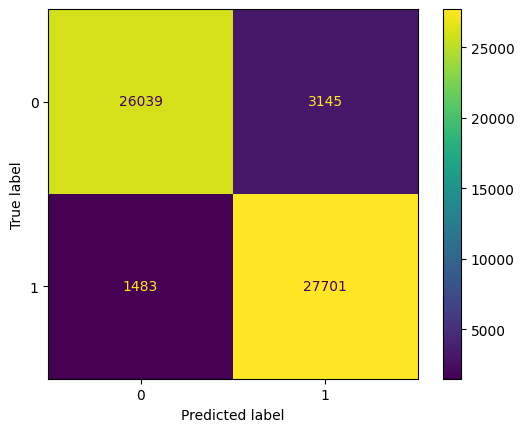

In [92]:
# Model Prediction Train
y_pred_train_knn_base = pipe_knn.predict(X_train_balanced)

# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train_balanced, y_pred_train_knn_base)

# Confusion Matrix Display - Train Set
ConfusionMatrixDisplay(cm_train).plot()

# Model Evaluation - Train Set
print(classification_report(y_train_balanced, y_pred_train_knn_base))

Hasil dari train terhadap model KKN cenderung bagus tetapi terdapat suatu kecenderungan dimana model lebih bisa memprediksi data yang syntetic yakni prediksi yes dari pada data original, dimana hal ini akan sangat berimplikasi penting terhadap test nanti yang akan nilainya cenderung turun

In [93]:
# Model Prediction Train
y_pred_test_knn_base = pipe_knn.predict(X_test_final)

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_knn_base))

              precision    recall  f1-score   support

          no       0.95      0.85      0.90      7353
         yes       0.34      0.63      0.44       883

    accuracy                           0.83      8236
   macro avg       0.64      0.74      0.67      8236
weighted avg       0.88      0.83      0.85      8236



dapat dilihat dari hasil diatas ternyata nilai dari hasil test memilki penurunan yang signifikan dikarenakn dataset yang imbalanced sehingga. dalam kasus ini akan beraparameter terhadap f1 score karena dataset yang imbalanced sehingga tidak akan bisa dipatokkan pada accuracy 

In [94]:
all_reports = performance_report(all_reports, pipe_knn, y_train_balanced, y_pred_train_knn_base, y_test, y_pred_test_knn_base, 'KNN Baseline')
pd.DataFrame(all_reports)
eval_model = pd.DataFrame(all_reports)
eval_model.to_csv('report_eval_model.csv', index=False)
eval_model

c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

,KNN Baseline
Train - f1_score,0.922905
Test - f1_score,0.438163
Train - F1 Mean - Cross Validation,0.882494
Train - F1 Std - Cross Validation,0.036337


Hasil yang sangat underfit terhadap model KKN sehingga diperlukan metode lainnya untuk mendapati hasil yang lebih baik

## 8.2 Baseline Model SVM

              precision    recall  f1-score   support

          no       0.96      0.86      0.91     29184
         yes       0.87      0.96      0.92     29184

    accuracy                           0.91     58368
   macro avg       0.92      0.91      0.91     58368
weighted avg       0.92      0.91      0.91     58368



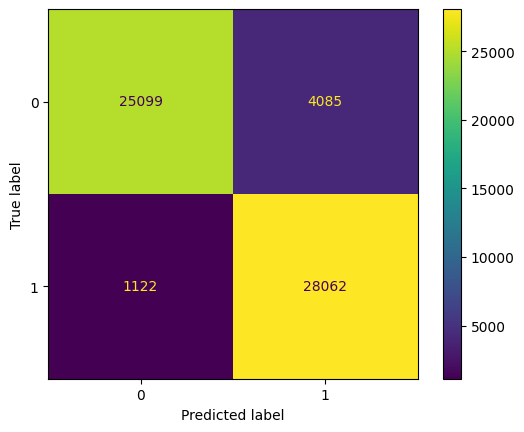

In [95]:
# Model Prediction Train
y_pred_svc_base = pipe_svc.predict(X_train_balanced)

# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train_balanced, y_pred_svc_base)

# Confusion Matrix Display - Train Set
ConfusionMatrixDisplay(cm_train).plot()

# Model Evaluation - Train Set
print(classification_report(y_train_balanced, y_pred_svc_base))

Pada nilai train f1 di model SVM ini cenderung lebih kecil hasilnya tetapi apabila dilihat dari kasus imbalanced data model ini lebih bagus untuk mempridiksi dari data yang original dibandingkan sintesis

In [96]:
# Model Prediction Test
y_pred_test_svc_base = pipe_svc.predict(X_test_final)

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_svc_base))

              precision    recall  f1-score   support

          no       0.98      0.85      0.91      7353
         yes       0.40      0.82      0.54       883

    accuracy                           0.85      8236
   macro avg       0.69      0.84      0.72      8236
weighted avg       0.91      0.85      0.87      8236



Model SVM juga mengalami penurunan yang signifikan terhadap prediksi data test dimana model ini sangat overfit sehingga diperlukan pemlihan model yang lainnya dan akan dibandingkan di keputusan akhir untuk pemilihan model terbaik untuk di tuning

In [97]:
all_reports = performance_report(all_reports, pipe_svc, y_train_balanced, y_pred_svc_base, y_test, y_pred_test_svc_base, 'SVM Baseline')
pd.DataFrame(all_reports)
eval_model = pd.DataFrame(all_reports)
eval_model.to_csv('report_eval_model.csv', index=False)
eval_model

c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,KNN Baseline,SVM Baseline
Train - f1_score,0.922905,0.915100
Test - f1_score,0.438163,0.536640
Train - F1 Mean - Cross Validation,0.882494,0.901876
Train - F1 Std - Cross Validation,0.036337,0.025762


Dari hasil Tolak Ukur menggunakan F1 Score dapat diliihat sangat sangat overfit terhap model satu dan dua yakni KNN dan SVM tetapi model SVM memilki nilai f1 score yang lebih bagus terhadap KNN 

## 8.3 Baseline Model Decision Tree

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29184
         yes       1.00      1.00      1.00     29184

    accuracy                           1.00     58368
   macro avg       1.00      1.00      1.00     58368
weighted avg       1.00      1.00      1.00     58368



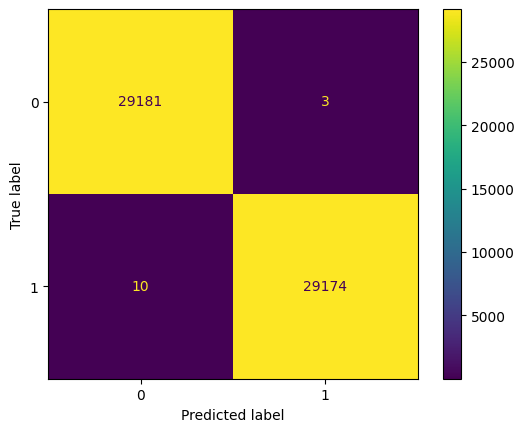

In [98]:
# Model Prediction Train
y_pred_train_dt_base = pipe_dt.predict(X_train_balanced)

# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train_balanced, y_pred_train_dt_base)

# Confusion Matrix Display - Train Set
ConfusionMatrixDisplay(cm_train).plot()

# Model Evaluation - Train Set
print(classification_report(y_train_balanced, y_pred_train_dt_base))

Dapat dilihat hasil dari prediksi train untuk model Decision Tree sangat bagus dimana 1.0 tetapi tetap perlu di cross check dengan hasil dari test

In [99]:
# Model Prediction Test
y_pred_test_dt_base = pipe_dt.predict(X_test_final)

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_dt_base))

              precision    recall  f1-score   support

          no       0.95      0.92      0.93      7353
         yes       0.46      0.57      0.51       883

    accuracy                           0.88      8236
   macro avg       0.70      0.74      0.72      8236
weighted avg       0.89      0.88      0.89      8236



Dalam hal ini dapat dilihat untuk pengecekkan test pada Decision Tree jatuh sekali untuk parameter f1 score karena masih belum bisa memprediksi label yang minoritas secara bagus

In [100]:
all_reports = performance_report(all_reports, pipe_dt, y_train_balanced, y_pred_train_dt_base, y_test, y_pred_test_dt_base, 'DT Baseline')
pd.DataFrame(all_reports)
eval_model = pd.DataFrame(all_reports)
eval_model.to_csv('report_eval_model.csv', index=False)
eval_model

,KNN Baseline,SVM Baseline,DT Baseline
Train - f1_score,0.922905,0.915100,0.999777
Test - f1_score,0.438163,0.536640,0.505817
Train - F1 Mean - Cross Validation,0.882494,0.901876,0.914997
Train - F1 Std - Cross Validation,0.036337,0.025762,0.055455


model DT baseline cenderung lebih bagus dibanding KNN tetapi lebih buruk dibanding degnan SVM 

## 8.4 Baseline Model Random Forest

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29184
         yes       1.00      1.00      1.00     29184

    accuracy                           1.00     58368
   macro avg       1.00      1.00      1.00     58368
weighted avg       1.00      1.00      1.00     58368



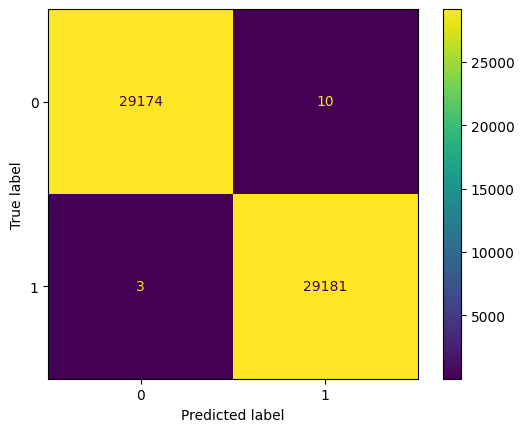

In [101]:
# Model Prediction Train
y_pred_train_rf_base = pipe_rf.predict(X_train_balanced)

# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train_balanced, y_pred_train_rf_base)

# Confusion Matrix Display - Train Set
ConfusionMatrixDisplay(cm_train).plot()

# Model Evaluation - Train Set
print(classification_report(y_train_balanced, y_pred_train_rf_base))

Pda hasil train diatas bisa dilihat sangat bagus, model dapat memprediksi dengan sangat bagus terhadap target tetapi perlu dibuktikan di Test

In [102]:
# Model Prediction Test
y_pred_test_rf_base = pipe_rf.predict(X_test_final)

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_rf_base))

              precision    recall  f1-score   support

          no       0.96      0.93      0.94      7353
         yes       0.53      0.66      0.59       883

    accuracy                           0.90      8236
   macro avg       0.75      0.80      0.77      8236
weighted avg       0.91      0.90      0.91      8236



Pada kasus ini juga sama seperti model yang lainnya dimana pada test model masih belum bisa memprediksi secara bagus untuk label yang minoritas sehingga akan snagat overfit apabila berparameter f1-score

In [103]:
all_reports = performance_report(all_reports, pipe_rf, y_train_balanced, y_pred_train_rf_base, y_test, y_pred_test_rf_base, 'RF Baseline')
pd.DataFrame(all_reports)
eval_model = pd.DataFrame(all_reports)
eval_model.to_csv('report_eval_model.csv', index=False)
eval_model

c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\envs\h8\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

,KNN Baseline,SVM Baseline,DT Baseline,RF Baseline
Train - f1_score,0.922905,0.915100,0.999777,0.999777
Test - f1_score,0.438163,0.536640,0.505817,0.591507
Train - F1 Mean - Cross Validation,0.882494,0.901876,0.914997,0.934861
Train - F1 Std - Cross Validation,0.036337,0.025762,0.055455,0.048179


Dapat dilihat RF Baseline memilki hasil paling bagus diantara yang lainnya

## 8.5 Baseline Model CatBoosting

              precision    recall  f1-score   support

          no       0.98      0.94      0.96     29184
         yes       0.95      0.98      0.96     29184

    accuracy                           0.96     58368
   macro avg       0.96      0.96      0.96     58368
weighted avg       0.96      0.96      0.96     58368



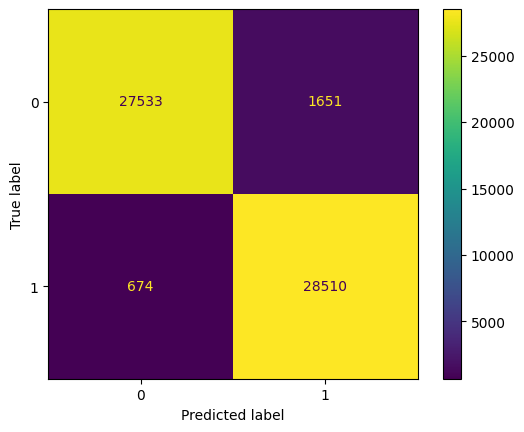

In [104]:
# Model Prediction Train
y_pred_train_cb_base = pipe_cb.predict(X_train_balanced)

# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train_balanced, y_pred_train_cb_base)

# Confusion Matrix Display - Train Set
ConfusionMatrixDisplay(cm_train).plot()

# Model Evaluation - Train Set
print(classification_report(y_train_balanced, y_pred_train_cb_base))

In [105]:
# Model Prediction Test
y_pred_test_cb_base = pipe_cb.predict(X_test_final)

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_cb_base))

              precision    recall  f1-score   support

          no       0.96      0.92      0.94      7353
         yes       0.52      0.70      0.60       883

    accuracy                           0.90      8236
   macro avg       0.74      0.81      0.77      8236
weighted avg       0.92      0.90      0.91      8236



In [106]:
all_reports = performance_report(all_reports, pipe_cb, y_train_balanced, y_pred_train_cb_base, y_test, y_pred_test_cb_base, 'CB Baseline')
pd.DataFrame(all_reports)
eval_model = pd.DataFrame(all_reports)
eval_model.to_csv('report_eval_model.csv', index=False)
eval_model

,KNN Baseline,SVM Baseline,DT Baseline,RF Baseline,CB Baseline
Train - f1_score,0.922905,0.915100,0.999777,0.999777,0.960822
Test - f1_score,0.438163,0.536640,0.505817,0.591507,0.599710
Train - F1 Mean - Cross Validation,0.882494,0.901876,0.914997,0.934861,0.929384
Train - F1 Std - Cross Validation,0.036337,0.025762,0.055455,0.048179,0.056044


Pada kasus ini model Cat Boosting memilki hasil yang paling bagus diantara yang lainnya tetapi mengorbankan waktu komputasi dan semua model yang telah dibuat dengan parameter default atau baseline nya masih ooverfit dan tidak bisa memprediksi secara bagus berdasarkan f1-score terhadap data testing yang imblanacedd

# 9. Hyper Parameter Tunning

In [107]:
# Menentukan pipeline dengan CatBoost
pipe_cb = Pipeline([
    ('transformer', transformer),
    ('classifier', CatBoostClassifier(verbose=3))
])

# Definisikan parameter grid untuk CatBoost
param_grid = {
    'classifier__iterations': [50, 100, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__depth': [4, 6, 8],
    'classifier__l2_leaf_reg': [1, 3, 5],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

# Inisialisasi GridSearchCV dengan pipeline
grid_search = GridSearchCV(
    estimator=pipe_cb,
    param_grid=param_grid,
    verbose=3,
    cv=3,  # Jumlah fold untuk cross-validation
    scoring='f1_macro',  # Gunakan metrik sesuai kebutuhan
    n_jobs=5  # Untuk memanfaatkan semua CPU
)

# Fit model
grid_search.fit(X_train_balanced, y_train_balanced)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
0:	learn: 0.4918829	total: 32.7ms	remaining: 9.76s
3:	learn: 0.2963920	total: 149ms	remaining: 11s
6:	learn: 0.2437408	total: 249ms	remaining: 10.4s
9:	learn: 0.2219199	total: 340ms	remaining: 9.87s
12:	learn: 0.2105517	total: 486ms	remaining: 10.7s
15:	learn: 0.2019986	total: 598ms	remaining: 10.6s
18:	learn: 0.1956814	total: 676ms	remaining: 10s
21:	learn: 0.1883793	total: 805ms	remaining: 10.2s
24:	learn: 0.1838470	total: 932ms	remaining: 10.3s
27:	learn: 0.1770773	total: 1.06s	remaining: 10.3s
30:	learn: 0.1729164	total: 1.18s	remaining: 10.2s
33:	learn: 0.1701397	total: 1.27s	remaining: 9.96s
36:	learn: 0.1669109	total: 1.35s	remaining: 9.61s
39:	learn: 0.1626466	total: 1.46s	remaining: 9.47s
42:	learn: 0.1597311	total: 1.65s	remaining: 9.84s
45:	learn: 0.1579055	total: 1.76s	remaining: 9.75s
48:	learn: 0.1547528	total: 1.89s	remaining: 9.69s
51:	learn: 0.1516364	total: 2.02s	remaining: 9.66s
54:	learn: 0.1490731	total

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'emp.var.rate',
                                                                          'euribor3m']),
                                                                        ('encoding '
                                                                         'nominal',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome']),
                                                                        ('encoding '
                                                                         'ordinal',
                                                                         Ordina...
                                                                                                     'university.degree',
                                                                                                     'unknown']]),
                                                                         ['education'])])),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x00000238945A76D0>)]),
             n_jobs=5,
             param_grid={'classifier__depth': [4, 6, 8],
                         'classifier__iterations': [50, 100, 300],
                         'classifier__l2_leaf_reg': [1, 3, 5],
                         'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__subsample': [0.6, 0.8, 1.0]},
             scoring='f1_macro', verbose=3)

In [108]:
# Lihat hasil
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'classifier__depth': 8, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.2, 'classifier__subsample': 1.0}
Best score found:  0.9324959334745765


Dari hasil diatas dapat dilihat bahwa best parameternya adalah : 

{'classifier__depth': 8, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 1, 'classifier__learning_rate': 0.2, 'classifier__subsample': 0.8}

Deengan Score f1 nya 0.9341622904234029

              precision    recall  f1-score   support

          no       0.99      0.97      0.98     29184
         yes       0.97      0.99      0.98     29184

    accuracy                           0.98     58368
   macro avg       0.98      0.98      0.98     58368
weighted avg       0.98      0.98      0.98     58368



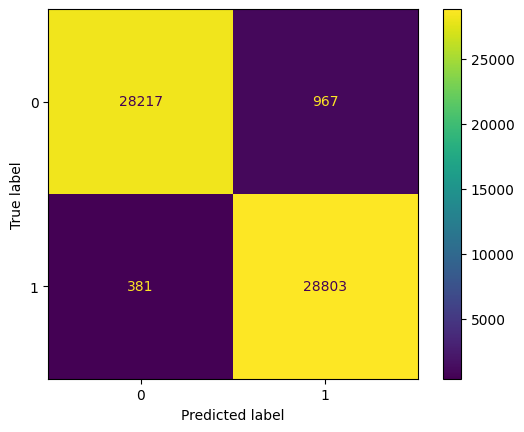

In [109]:
# Gunakan parameter terbaik untuk model akhir
best_model = grid_search.best_estimator_

# Model Prediction Train
y_pred_train_cb_tuned = best_model.predict(X_train_balanced)

# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train_balanced, y_pred_train_cb_tuned)

# Confusion Matrix Display - Train Set
ConfusionMatrixDisplay(cm_train).plot()

# Model Evaluation - Train Set
print(classification_report(y_train_balanced, y_pred_train_cb_tuned))

In [110]:
# Model Prediction Test
y_pred_test_cb_tuned = best_model.predict(X_test_final)

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_cb_tuned))

              precision    recall  f1-score   support

          no       0.96      0.93      0.94      7353
         yes       0.52      0.66      0.58       883

    accuracy                           0.90      8236
   macro avg       0.74      0.79      0.76      8236
weighted avg       0.91      0.90      0.90      8236



In [111]:
all_reports = performance_report(all_reports, best_model, y_train_balanced, y_pred_train_cb_tuned, y_test, y_pred_test_cb_tuned, 'CB Tuned')
pd.DataFrame(all_reports)
eval_model = pd.DataFrame(all_reports)
eval_model.to_csv('report_eval_model.csv', index=False)
eval_model

0:	learn: 0.4712384	total: 13.9ms	remaining: 4.17s
3:	learn: 0.2756694	total: 136ms	remaining: 10.1s
6:	learn: 0.2190149	total: 281ms	remaining: 11.7s
9:	learn: 0.1961690	total: 375ms	remaining: 10.9s
12:	learn: 0.1807753	total: 540ms	remaining: 11.9s
15:	learn: 0.1713917	total: 679ms	remaining: 12.1s
18:	learn: 0.1625709	total: 837ms	remaining: 12.4s
21:	learn: 0.1549972	total: 959ms	remaining: 12.1s
24:	learn: 0.1499876	total: 1.1s	remaining: 12.1s
27:	learn: 0.1443097	total: 1.19s	remaining: 11.6s
30:	learn: 0.1383304	total: 1.35s	remaining: 11.8s
33:	learn: 0.1332312	total: 1.51s	remaining: 11.8s
36:	learn: 0.1298854	total: 1.67s	remaining: 11.9s
39:	learn: 0.1245014	total: 1.8s	remaining: 11.7s
42:	learn: 0.1196596	total: 1.92s	remaining: 11.5s
45:	learn: 0.1153052	total: 2.07s	remaining: 11.4s
48:	learn: 0.1119284	total: 2.22s	remaining: 11.4s
51:	learn: 0.1090454	total: 2.38s	remaining: 11.3s
54:	learn: 0.1068680	total: 2.55s	remaining: 11.4s
57:	learn: 0.1033623	total: 2.69s	re

,KNN Baseline,SVM Baseline,DT Baseline,RF Baseline,CB Baseline,CB Tuned
Train - f1_score,0.922905,0.915100,0.999777,0.999777,0.960822,0.977135
Test - f1_score,0.438163,0.536640,0.505817,0.591507,0.599710,0.579870
Train - F1 Mean - Cross Validation,0.882494,0.901876,0.914997,0.934861,0.929384,0.930984
Train - F1 Std - Cross Validation,0.036337,0.025762,0.055455,0.048179,0.056044,0.058912


Pada kasus ini dapat dilihat bahwsanya hasil CB_Tunedd yang telah di tuned pun masih belum bisa memberikan impact performa yang lebih baik cenderung turun dibandingkan dengan CB_Baseline

# 10. Kesimpulan

Dalam bagian ini akan menjelaskan beberapa kesimpulan yang ditemukan dalam menyelesaikan project yakni : 

*  Kesimpulan EDA : 
    1. Dataset ini sangat imbalanced dengan proporsi 88:12 sehingga diperlukan handling terhadap imbalanced data
    2. Ada Multi Korelasi antar fitur sehingga lebih baik apabila menggunakan model yang tidak ada asumsi no multi corelation
    3. Ada banyak outliers terhadap dataset ini yang juga hal ini perlu dihandling dengan cara yang tepat
*  Kesimpulan FE :
    1. Handling Outliers dengan menggunakan Capping sehingga akan memberikan efek samping terhadap model yang kurang bisa memprediksi variasi data yang banyak kaarena data nya di capping
    2. Metode Balancing Menggunakan Oversampling pada Minority atau memperbanyak data minoritas dengan syntetic data atau data yang serupa tetapi perlu diingat pada kasus ini balancing data di handling setelah melakukan handling outliers sehingga bisa dibilang tidak akan ada terlalu banyak variance suatu data terhadap prediksi model nantinya atau bisa dibilang data  syntetic yang dibuat akan kecenderungan sama sehingga pada akhirnya apabila untuk prediksi model yang imbalanced dengan test yang variance nya banyak akan cenderung tetapi besar kemungkinan model tidak perform bagus atau overfitting karena hanya bisa memprediksi mayoritas saja 
*  Kesimpulan Model : 
    1. Model yang terbaik adalah Cat Boosting dengan baseline parameter berdasarkan F1-Sccore yang didapatkan tetapi memilki kelamahan yakni waktu komputasi yang cenderung lebih besar dibandingkan dengna KNN dan Decision Tree
    2. Pada kasus imbalanced dataset ini model masih belum bisa secara optimal memprediksi kelas minoritas dikarenakan salah satu nya adalah variance terhadap dataset di Train sudah dihandling dengan Capping method sehingga akan lebih sedikit dan setelah itu baru di berikan pendekatan Balancing Data sehingga model akan mendapati suatu dataset yang memilki pola yang sedikit dibandingkan dengan Mayoritas yang memilki pola banyak, sehingga pada Uji Test Score nya masih tetap akan overfit walaupun pasti lebih bagus dari pada tannpa handling imbalance
    3. Hasil Dari Cross Validation juga dapat dilihat bahwasnya Model CB_Baseline memilki hasil yang cukup bagus dimana pada train nilai f1 score bagus serta rentan error variannya juga cukup rendah
    4. Ada beberapa Fitur yang tidak di handling outliersnya karena memang by default diatur menjadi nilai tersebut 
*  Kesimpulan Bisnis :
    1. Mengoptimalkan Strategi Pemasaran: Menargetkan pelanggan yang lebih mungkin untuk berlangganan deposit, meningkatkan efisiensi kampanye pemasaran.
    2. Meningkatkan Retensi Pelanggan: Memahami pola dan karakteristik pelanggan yang berlangganan dapat membantu bank dalam merancang produk dan layanan yang lebih sesuai.
    3. Pengambilan Keputusan yang Lebih Baik: Dengan prediksi yang lebih akurat, bank dapat membuat keputusan yang lebih informasional terkait dengan penawaran dan strategi bisnis.
*  Next Improvemnet :
    * Untuk kedepannya akan melakukan handling terhadap data imbalanced dengan cara Undersampling atau bahkan bisa menggunakan Metode Mix dan juga penerapan teknik handling outliers dengan bukan hanya capping sehingga tidak akan menggenerate data syntetic yang banyak dimana hal ini akan mengakibatkan kecenderungan pola yang sama, serta akan menerapkan beberapa model yang lainnya bahkan apabila diperlukan untuk mengerjar performa model akan menerapkan ANN 

# 11. Save Model

In [117]:
#save model knn tuned
with open('pipe_cb.pkl', 'wb') as file_1:
  pickle.dump(pipe_cb, file_1)

In [118]:
pipe_cb

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'emp.var.rate',
                                                   'euribor3m']),
                                                 ('encoding nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('encoding ordinal',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree',
                                                                              'unknown']]),
                                                  ['education'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000238945A76D0>)])

# 12. Conseptual Problem

1.  Jelaskan latar belakang adanya bagging dan cara kerja bagging !
    * Latar Belakang Adanya Bagging :
        Bagging, singkatan dari "Bootstrap Aggregating," diperkenalkan untuk mengatasi overfitting dan meningkatkan stabilitas serta akurasi model machine learning. Overfitting terjadi ketika model terlalu "menghafal" data latih sehingga kinerjanya menurun saat dihadapkan pada data baru. Bagging mengurangi variabilitas model dengan menggabungkan hasil dari beberapa model yang dilatih secara independen.
    * Cara Kerja : 
        Bagging, singkatan dari "Bootstrap Aggregating," bekerja dengan membuat beberapa subset dari dataset asli menggunakan teknik sampling dengan penggantian, sehingga beberapa sampel dapat muncul lebih dari sekali dalam satu subset. Setiap subset bootstrap digunakan untuk melatih model yang sama, seperti Decision Tree. Setelah semua model dilatih, prediksi dari semua model digabungkan; untuk klasifikasi digunakan voting mayoritas, sementara untuk regresi digunakan rata-rata prediksi dari semua model. Bagging mengurangi overfitting, meningkatkan stabilitas dan akurasi, serta mudah diterapkan, terutama pada algoritma yang sensitif terhadap perubahan dalam data latih.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
    
    Random Forest dan CatBoost adalah algoritma machine learning yang digunakan untuk tugas klasifikasi dan regresi, tetapi mereka memiliki cara kerja yang berbeda.

    * **Random Forest** bekerja dengan membuat banyak pohon keputusan (decision trees) dari subset data yang berbeda, menggunakan teknik yang disebut bagging. Setiap pohon dalam hutan acak dilatih secara independen, dan prediksi akhir dihasilkan dengan menggabungkan prediksi dari semua pohon, biasanya melalui voting mayoritas untuk klasifikasi atau rata-rata untuk regresi. Pendekatan ini membantu mengurangi overfitting dan meningkatkan akurasi model.

    * **CatBoost** (Categorical Boosting) adalah algoritma boosting yang secara khusus dioptimalkan untuk menangani data kategorikal. CatBoost bekerja dengan membangun model secara bertahap, di mana setiap model baru dibangun untuk memperbaiki kesalahan dari model sebelumnya. CatBoost menggunakan teknik khusus untuk mengubah data kategorikal menjadi numerik dengan cara yang mempertahankan informasi penting, dan secara iteratif menambahkan model baru untuk mengurangi kesalahan secara bertahap. Ini membuat CatBoost sangat efektif dalam menangani dataset dengan banyak fitur kategorikal dan menghasilkan model yang sangat akurat.

    Secara sederhana, Random Forest menggabungkan banyak pohon keputusan yang dilatih secara independen, sementara CatBoost secara iteratif memperbaiki kesalahan model sebelumnya, dengan fokus khusus pada data kategorikal.

3.  Jelaskan apa yang dimaksud dengan Cross Validation !

    Cross Validation adalah teknik yang digunakan untuk menilai seberapa baik model machine learning akan bekerja pada data yang belum pernah dilihat sebelumnya. Proses ini melibatkan membagi data menjadi beberapa bagian (atau "folds"). Pada setiap iterasi, satu bagian digunakan sebagai data uji dan bagian lainnya sebagai data latih. Proses ini diulang beberapa kali sehingga setiap bagian data digunakan sekali sebagai data uji. Hasil dari setiap iterasi kemudian dirata-rata untuk memberikan estimasi kinerja model yang lebih akurat dan andal. Teknik ini membantu memastikan bahwa model tidak overfitting pada data latih dan dapat generalisasi dengan baik pada data baru.